In [2]:
### IMPORTS ###
import pandas
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
def printao(pred_y, test_y):
    ### PRINT RESULTS ###
    # Get histogram of predited data and test
    hist_pred, bins_pred = np.histogram(pred_y, 109)
    hist_test, bins_test = np.histogram(test_y, 109)

    # Prepare result bars
    width = 0.7 * (bins_pred[1] - bins_pred[0])
    center = (bins_pred[:-1] + bins_pred[1:]) / 2
    plt.bar(center, hist_pred, align='center', width=2, alpha=0.8, color='pink')

    # Prepare real data bars
    width = 0.7 * (bins_test[1] - bins_test[0])
    center = (bins_test[:-1] + bins_test[1:]) / 2
    plt.bar(center, hist_test, align='center', width=2, alpha=0.4, color='blue')

    plt.show()

    # Print 1D plots
    plt.scatter(test_y, [1.9] * len(test_y), color='blue', alpha=0.2, s=500, edgecolors='none')
    plt.scatter(pred_y, [1.99] * len(pred_y), color='pink', alpha=0.2, s=500, edgecolors='none')
    plt.show()

In [3]:
### GET DATA FROM FILE ###
data = pandas.read_csv("year-prediction-msd-train.txt")
#data

In [4]:
### SPLIT TRAIN AND TEST DATA ###
train, test = train_test_split(data, shuffle=True, train_size=0.8)

In [5]:
### SLIPT X AND F(X) ###
test_x = test.loc[:, 'ta01':]
test_y = test['year'].values.reshape(-1, 1)

train_x = train.loc[:, 'ta01':]
train_y = train['year'].values.reshape(-1, 1)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
x_s = scaler.transform(train_x)

scaler.fit(test_x)
x_t = scaler.transform(test_x)

# from sklearn.preprocessing import normalize

# x_s = normalize(train_x)
# x_t = normalize(test_x)

In [36]:
sgdreg = linear_model.SGDRegressor(eta0=1e-3, tol=None, max_iter=100)
sgdreg.fit(x_s, train['year'].values)
score = sgdreg.score(x_t,  test['year'].values)

pred_y = sgdreg.predict(x_t)

print(score)

0.240367849445


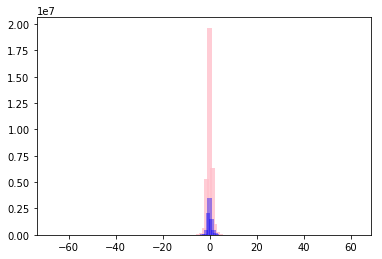

ValueError: x and y must be the same size

In [35]:
printao(pred_y, test_y)

In [121]:
SGD = linear_model.SGDRegressor(eta0=2e-8, loss='squared_loss', penalty='none', learning_rate='constant',tol=None)

SGD.fit(train_x,  train['year'].values)
score = SGD.score(test_x,  test['year'].values)
pred_y = SGD.predict(test_x)

# Round and convert data to year
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

score

-277.9627047818276

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()

clf = GridSearchCV(svc, parameters)
clf.fit(train_x, train['year'].values)

In [54]:
### APPLY LINEAR REGRESSION ###
regr = linear_model.LinearRegression(n_jobs=4)

regr.fit(train_x, train_y)
score = regr.score(test_x, test_y)
pred_y = regr.predict(test_x)
# Round and convert data to year
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

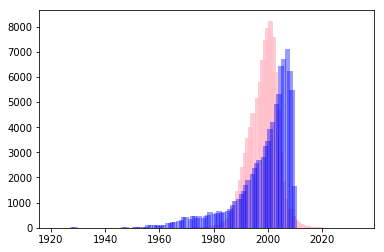

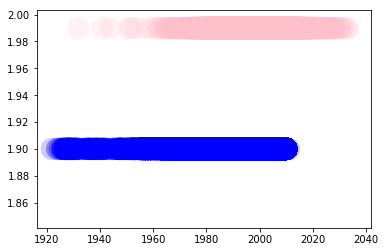

Score 0.241754443263


In [55]:
### PRINT RESULTS ###
# Get histogram of predited data and test
hist_pred, bins_pred = np.histogram(pred_y, 109)
hist_test, bins_test = np.histogram(test_y, 109)

# Prepare result bars
width = 0.7 * (bins_pred[1] - bins_pred[0])
center = (bins_pred[:-1] + bins_pred[1:]) / 2
plt.bar(center, hist_pred, align='center', width=2, alpha=0.8, color='pink')

# Prepare real data bars
width = 0.7 * (bins_test[1] - bins_test[0])
center = (bins_test[:-1] + bins_test[1:]) / 2
plt.bar(center, hist_test, align='center', width=2, alpha=0.4, color='blue')

plt.show()

# Print 1D plots
plt.scatter(test_y, [1.9] * len(test_y), color='blue', alpha=0.2, s=500, edgecolors='none')
plt.scatter(pred_y, [1.99] * len(pred_y), color='pink', alpha=0.2, s=500, edgecolors='none')
plt.show()

print("Score " + str(score))

Precision: 5.26%


In [57]:
print("Result   Real")
for i in range(0, len(pred_y)):
    print(" " + str(pred_y[i][0]) + "    " + str(test_y[i][0]))

Result   Real
 2000    1993
 1996    1962
 1995    1983
 1993    1965
 2002    2007
 1992    2003
 1998    1998
 2002    1996
 2004    2005
 2001    2006
 1992    1967
 1996    1994
 2004    1998
 2001    1987
 1992    1985
 2001    2000
 2002    2000
 1988    2003
 2003    2000
 2000    2003
 1996    1982
 1995    1987
 1991    1988
 2001    1997
 1982    2001
 1997    2001
 2000    2003
 2005    1999
 2002    2005
 1992    1993
 2002    2006
 1996    1987
 1996    1992
 1992    1957
 1991    2000
 2002    2003
 1998    1974
 2003    1975
 1996    2006
 2001    2009
 2000    2009
 1996    1994
 2001    1988
 1990    1988
 2003    2005
 1996    1993
 2001    2003
 1999    1977
 2002    2002
 1985    2001
 2002    2006
 2004    2000
 2000    2009
 2005    2006
 2003    2008
 1998    1995
 2003    2008
 2001    2008
 1993    2008
 1994    1998
 2003    2007
 1994    1987
 2001    2006
 2001    1993
 1998    1997
 1998    1993
 1997    2008
 1996    1966
 1998    1997
 1988    1998
 2000 

 2000    2008
 1998    1997
 2002    2008
 1991    1974
 2004    2009
 2001    1997
 2000    2007
 2007    2009
 1999    1994
 1997    1995
 2001    2000
 2001    2006
 2002    2003
 1999    2000
 1992    1997
 2000    2005
 2004    1999
 2001    2001
 2011    2004
 2000    2007
 1999    2008
 2002    2000
 1999    2008
 1993    2001
 2004    1994
 1989    1994
 2001    2009
 2000    2010
 2003    2006
 1999    2002
 1987    1965
 2000    1998
 1994    1995
 1999    1994
 2001    1993
 1998    2004
 2001    2002
 2001    1999
 1989    2000
 1996    2005
 2000    1969
 2003    2008
 1996    1998
 2000    2009
 1996    1985
 2000    1998
 1999    2008
 2004    2008
 2003    2009
 1994    2006
 1996    1987
 1994    1995
 1993    1983
 1991    2000
 2000    2006
 2001    2007
 1993    1998
 2002    1997
 1992    1990
 2000    2009
 1999    2005
 2002    2007
 1999    1996
 2001    2008
 2005    2005
 1998    2006
 1996    1983
 1990    1994
 1998    1991
 1996    1965
 2003    2003
 2004 

 1993    2007
 2000    1999
 2001    1999
 2000    1985
 1999    2009
 2008    2006
 1997    1995
 1992    1972
 2004    2000
 2003    2004
 2001    2005
 2002    2008
 1999    2002
 1998    1994
 1998    2004
 2002    2007
 2004    2004
 2000    2004
 1994    1956
 2002    2006
 2000    1999
 2004    2003
 2000    1998
 1996    1995
 2002    2005
 1987    1991
 1997    1996
 2000    1994
 2001    2006
 1988    2005
 2004    2008
 2009    2007
 2002    2007
 2004    2001
 1990    1976
 1997    1995
 2004    2005
 1996    1999
 1999    2002
 2001    2008
 1997    1991
 1996    1998
 1987    1995
 1989    1990
 2003    1999
 1998    2006
 2002    2008
 1997    1999
 1998    2001
 2004    2008
 1996    2009
 2000    2006
 1992    1991
 2000    2007
 2005    1999
 2004    2007
 2000    2004
 2003    2007
 1998    2010
 2000    1992
 1998    2004
 2001    2001
 2002    2009
 2002    2007
 1999    2003
 1990    1958
 2004    2009
 2000    2006
 2004    2006
 2001    2006
 2001    1997
 1994 

 1998    2006
 2003    2008
 2000    1999
 2000    1995
 1997    1999
 1986    1987
 2003    2007
 2002    2001
 1998    2000
 1996    2003
 1998    2005
 2000    2003
 1998    2009
 1999    1996
 2007    2009
 2004    2007
 2001    2005
 1993    1977
 2000    2006
 1989    1972
 1998    1989
 1998    2001
 2001    2007
 2000    2003
 1992    1992
 2002    2002
 1999    2005
 2001    2007
 2002    2010
 2002    1999
 1994    1998
 1991    1976
 2001    1972
 1999    2006
 2005    2009
 1995    2004
 1996    2001
 2006    2009
 1995    1994
 2003    2004
 2003    2004
 2003    2005
 1999    2009
 2000    1996
 2001    2006
 1989    1968
 1999    2004
 1995    1995
 1997    2002
 2004    2006
 2009    2007
 1999    2001
 1996    1995
 2010    2006
 1996    2005
 2001    1996
 2005    2009
 2002    2006
 1995    1998
 2006    2003
 1999    2000
 1999    1995
 2000    2001
 1998    2001
 2001    2003
 2002    1997
 1999    2003
 1995    2006
 1991    1994
 1997    1997
 1992    2000
 2007 

 2003    2009
 1997    2005
 1994    1997
 1994    1984
 1998    1986
 1991    1990
 1998    2007
 1993    1988
 2000    2003
 1995    1992
 2004    2007
 2003    1997
 1997    1991
 1997    1991
 1997    2002
 2001    2004
 2004    2002
 1987    2002
 2003    2008
 1995    2004
 2002    2003
 1998    1988
 2001    2009
 1994    1995
 2003    2007
 1982    1979
 1993    1991
 1995    1992
 2001    1995
 1998    1999
 2001    1998
 1997    2009
 1996    1995
 2005    1997
 1997    1995
 1997    1998
 1997    2008
 2005    2007
 1990    1962
 1997    2007
 1992    1973
 1998    2010
 1989    2009
 2003    2001
 2002    2003
 2003    2008
 2002    1995
 1991    2003
 1990    1976
 1996    1992
 2002    1993
 1993    1989
 1995    2005
 1989    1999
 1997    1997
 1999    1965
 2001    2002
 1996    1994
 1996    2000
 1994    1972
 2002    2001
 2001    1992
 1995    2007
 1998    2000
 1986    1989
 2003    2003
 2002    1995
 1996    1995
 1996    2006
 1997    1960
 2000    1995
 2000 

 1998    1999
 1998    2006
 1990    2010
 1986    1997
 1998    1996
 2002    2008
 1990    1988
 2002    1995
 1993    1989
 1998    2003
 2002    2003
 1993    1961
 1998    2007
 1999    1994
 2002    2001
 1999    1994
 1994    1994
 2001    2006
 2005    2005
 1996    1997
 2000    2009
 2002    1990
 2001    2002
 2005    2006
 2001    1996
 1996    1985
 1996    1995
 1998    1962
 1998    1998
 1996    2005
 2004    2001
 1991    1989
 1999    1992
 1996    2006
 1999    2005
 2006    2007
 1999    1997
 2000    2001
 1997    2008
 1993    1988
 2006    2010
 1992    2001
 2005    2007
 2002    2005
 1998    1997
 1999    2005
 2004    2007
 2004    1993
 1999    2003
 1998    1999
 2002    2009
 1982    1993
 2001    1992
 1997    2006
 2001    2009
 1986    1974
 2003    2002
 2000    2008
 2006    2000
 2003    2007
 1997    1995
 1989    1964
 1998    2005
 2006    2009
 2004    2004
 2002    2006
 2005    2003
 2000    2003
 2002    2006
 2001    2000
 1998    2007
 2000 

 1989    1992
 2005    2009
 1991    1991
 1991    1961
 1999    2007
 2004    2008
 2005    2003
 1998    1986
 1999    1985
 2005    2005
 1999    1992
 2004    2007
 1995    1991
 1992    1989
 2001    1999
 1998    2007
 1989    2003
 1981    1998
 1995    1963
 2003    2010
 2001    2002
 2005    2007
 2003    2005
 1996    1981
 2004    2006
 1999    1980
 2001    1999
 1994    1988
 1991    1997
 2000    2001
 1999    2000
 1997    1985
 1999    1995
 1994    1990
 2004    2004
 1995    1990
 1982    1971
 1996    2004
 2002    2005
 2003    2005
 1993    1996
 1999    1992
 1998    2006
 1999    1985
 2003    2007
 1999    2004
 1993    1980
 1996    1982
 2006    2009
 2003    2000
 1984    2005
 1999    2006
 1994    2005
 1989    1996
 1991    1992
 2004    2001
 2004    2010
 1987    1992
 2005    2001
 1990    1970
 2002    2002
 2003    2008
 1999    1999
 1998    1967
 1999    2009
 1999    1997
 2008    2007
 2002    1993
 2001    1997
 1992    1974
 2002    2006
 2000 

 2004    2002
 1989    1990
 2002    2007
 1995    2005
 1996    2003
 2002    1998
 1996    1969
 1997    2004
 2008    2008
 2001    2003
 1998    1982
 2001    2003
 2003    2003
 2005    2005
 2001    2001
 1999    2002
 1994    2004
 1996    1999
 2001    1999
 1998    1998
 1995    1982
 2003    2002
 1998    1991
 2000    2005
 1996    1985
 2002    2008
 2000    1998
 2002    2009
 2002    1992
 2006    2005
 2002    2004
 1999    1992
 2002    2004
 2000    2004
 1998    2008
 1987    1970
 1999    1997
 2003    2006
 2001    2006
 1991    1986
 1996    1998
 2005    2008
 1997    1977
 2000    1999
 2002    2008
 1993    1991
 1999    1996
 1992    1992
 2001    2010
 2003    2006
 1996    1992
 2001    1997
 1996    1956
 2002    2002
 1995    1989
 1991    2001
 2003    1994
 2007    2000
 1997    1994
 1990    1978
 1986    1993
 1998    2004
 2000    2004
 1998    2003
 1990    1987
 1992    1979
 1999    2007
 2000    2008
 1999    2001
 2005    2003
 2007    2006
 1994 

 1997    2003
 2003    1995
 1997    2001
 1999    2007
 2000    1975
 2004    1998
 2002    1995
 1998    2002
 2000    2005
 1997    2000
 2000    2002
 1994    2009
 1998    2001
 2004    2007
 2001    2006
 2010    2007
 1991    2001
 2000    2010
 2008    2008
 1995    1986
 1999    1991
 2000    2002
 2001    1990
 2000    1999
 2001    2009
 2004    2001
 2000    2006
 2000    1998
 1997    2004
 2000    2004
 2005    2005
 1999    1982
 1999    2005
 2000    2010
 1993    1985
 2003    2006
 1997    2008
 2002    2003
 1998    2002
 2002    2002
 2004    1999
 2000    2006
 2004    2005
 2008    2008
 2000    2007
 1998    2008
 1981    1995
 2001    2007
 1999    1992
 1998    1989
 2002    2009
 2002    2007
 1989    1992
 2000    2007
 2005    2002
 2001    2003
 2015    2008
 1992    2002
 1997    2007
 1998    2000
 1993    1998
 2000    2005
 2003    2005
 2002    2002
 2004    2002
 2003    2006
 1992    1989
 1988    1978
 1993    2004
 1992    1995
 1998    1996
 2003 

 1992    1988
 2003    2005
 1987    1981
 1998    2007
 2010    2002
 1991    1999
 1992    1981
 2009    2009
 1996    2001
 1999    2008
 1996    1998
 2001    1998
 1995    2001
 1993    1972
 2000    2009
 1998    2004
 1994    1993
 2001    2003
 2000    1993
 1993    1996
 1996    1971
 2003    1989
 1996    1969
 1989    1984
 2003    2010
 1997    2006
 2001    1994
 2007    2003
 1996    1974
 2001    2005
 2000    2005
 1985    1998
 1995    1996
 1996    1996
 2005    2001
 2001    2005
 1993    1973
 1999    1996
 1994    2004
 1993    1995
 2000    2003
 1991    2000
 1999    1991
 2005    1997
 1995    1990
 1995    1991
 1994    1998
 1996    1999
 1988    1973
 2000    2004
 1997    2005
 2001    1986
 1996    2001
 1995    1973
 2005    2001
 1995    1995
 1995    1994
 1999    2001
 2003    2008
 1993    1999
 1996    2007
 1993    1981
 2002    2006
 1996    2006
 1998    1997
 1997    1998
 1994    1984
 2004    2003
 2001    2003
 1999    2003
 2001    1999
 1994 

 2003    2005
 2003    2006
 2004    2009
 1999    2008
 2000    2003
 2000    2006
 1996    2007
 2004    2007
 1989    1995
 2003    2007
 1999    2002
 2003    2004
 2001    1994
 2002    2006
 2000    2005
 2001    2005
 2001    2005
 1982    1973
 1995    1966
 2004    2008
 1993    1993
 1999    1997
 1994    2006
 1990    2000
 1996    1997
 1996    2000
 1998    2009
 2002    1998
 2002    2006
 1997    1986
 1999    1994
 1993    2007
 2000    2008
 2003    2006
 2004    2006
 2006    2005
 1990    1967
 1999    1988
 2001    1973
 2006    2000
 1993    2005
 1992    1989
 2003    2006
 2004    1980
 1991    1977
 2002    2001
 1997    1989
 1998    2005
 2001    2008
 2006    2001
 2000    2004
 1999    2004
 2006    1999
 1998    1996
 2001    1998
 2001    1997
 1997    2005
 2008    2008
 2001    2007
 1990    2000
 1991    1994
 2002    2007
 1996    1981
 1995    1998
 2003    2003
 2001    2004
 2004    2003
 2001    2005
 2002    1981
 1993    1990
 1995    1979
 1998 

 2002    2000
 2002    2000
 1996    2003
 1991    2008
 1995    1985
 1997    2008
 1996    2010
 1998    1988
 2000    1986
 1992    1978
 2000    2007
 1988    1992
 2006    2010
 1996    2005
 2001    2001
 1997    2004
 1997    2004
 1996    2004
 1999    2009
 1997    2003
 2004    2008
 2001    1974
 1988    1993
 1988    1977
 1995    1992
 1993    1991
 1991    1989
 2001    2005
 1995    2006
 2001    2009
 2001    2009
 2001    2000
 1993    2008
 1999    1998
 1994    1983
 2005    2003
 2001    2003
 2000    2000
 1996    1996
 1997    1991
 1997    2004
 2000    2000
 2004    2005
 1997    1984
 1998    1998
 1994    1971
 2004    1982
 1999    1996
 2000    2004
 1986    1998
 2001    1997
 1997    1998
 1991    1986
 1994    1991
 1995    2007
 2003    1990
 1994    2007
 2001    2009
 1994    1982
 2001    1996
 1993    1977
 2004    2009
 1993    1962
 1999    1988
 1992    2003
 1999    1996
 1996    2008
 2001    1997
 2004    2005
 1996    1977
 1998    1994
 2003 

 2002    1987
 1991    1977
 2001    2009
 2002    2004
 2007    2005
 1997    1984
 1993    2006
 2003    1995
 2004    2002
 2002    2005
 1993    1988
 2004    2006
 2003    2002
 2002    2007
 1999    2001
 1980    2006
 1996    2007
 1998    2005
 1995    2007
 1973    1983
 1998    2003
 1991    2004
 1996    1991
 2005    2007
 2003    2004
 2003    2008
 2006    2007
 2000    2001
 2007    2000
 1993    1996
 1996    2002
 2003    1999
 2001    2006
 1998    2003
 1999    1997
 1994    2005
 1997    1979
 2001    2000
 1997    1997
 1999    2000
 2000    2008
 1999    2005
 1994    2000
 2000    1993
 1993    1987
 2000    2007
 1996    2001
 1999    1979
 2005    2008
 1996    1999
 2003    2003
 2003    2009
 2001    2002
 1999    2004
 2001    2008
 1996    1981
 1999    2001
 2007    2005
 1995    2002
 2004    2000
 1996    2006
 1996    1995
 1989    1996
 2005    2006
 2003    2007
 1999    1975
 2000    1988
 2005    2008
 2003    2009
 2006    2009
 2003    2008
 2000 

 1992    1996
 1997    2006
 1997    1996
 2003    2005
 1994    1992
 1994    2003
 2008    2010
 1995    1990
 1991    1978
 2003    2003
 2000    1994
 1998    2001
 1994    2005
 2007    2009
 1995    2006
 2000    1997
 1990    1979
 1989    1986
 2006    2006
 1997    2005
 2004    2007
 1997    2006
 2003    2008
 2006    2006
 1998    2007
 2003    2006
 2002    2003
 1999    2006
 2002    2006
 1990    1996
 2002    2005
 2003    2009
 1988    1992
 2003    2009
 2006    2003
 2000    2000
 1996    1972
 1993    1997
 1993    2002
 2004    1998
 2004    2006
 1990    1983
 1997    1994
 2008    2003
 1991    1955
 1992    1982
 1996    1999
 1999    2002
 2001    1997
 1992    1992
 1998    2007
 1998    1995
 1993    1976
 2001    2008
 1993    1989
 2001    2001
 1999    2005
 2000    2007
 1998    2008
 2001    2000
 2001    2006
 2000    2008
 1992    1987
 1994    1970
 2004    2008
 2000    1982
 2000    2007
 1994    1994
 1989    2002
 1995    1993
 2003    2006
 2005 

 2004    2001
 2000    2002
 1998    2009
 1999    2006
 1996    2007
 1999    1996
 2012    1998
 2002    1999
 2002    2005
 1991    1994
 1994    1994
 2004    2009
 1987    1989
 1992    1980
 1989    1978
 1992    1989
 2003    1995
 1993    2005
 1995    1994
 1999    2001
 1990    2003
 2002    2009
 2004    2002
 1999    2009
 2011    2007
 1993    1990
 2002    1998
 1999    1980
 2004    2004
 1991    1988
 2006    2008
 2002    2008
 1997    2003
 2007    2004
 2002    2002
 2002    2008
 2006    2009
 2002    2009
 1997    1981
 2000    2004
 1993    2004
 1990    1978
 2000    2008
 1999    2009
 1997    2006
 2001    2009
 2000    2002
 2001    2001
 2002    2005
 1999    2002
 2002    2004
 2007    2006
 1997    1994
 2002    2006
 1997    1987
 1992    2005
 2000    2007
 2002    2004
 2000    1992
 2003    2004
 2003    2001
 2002    2000
 2003    2002
 1995    1996
 1990    1972
 1998    1979
 1987    1996
 1999    2005
 2000    1999
 1995    1987
 2006    1998
 2001 

 1975    1982
 1999    2004
 1991    1997
 2001    2005
 2004    2006
 2001    2007
 1994    1973
 2000    2002
 1998    2009
 1982    1994
 1988    2001
 1993    1965
 1991    1993
 2000    1982
 2001    2009
 2004    2008
 1999    2001
 2001    2008
 2002    2003
 2002    2007
 1999    2007
 1999    2005
 1999    2005
 1996    2005
 2001    2002
 2004    2008
 1996    2005
 2004    1999
 1987    2005
 1998    2010
 1990    2008
 2001    2005
 2005    2003
 1993    1994
 1990    1997
 1996    2008
 2004    2003
 2004    2009
 1992    1987
 2002    2002
 2002    2009
 2000    2005
 2002    2010
 1997    2006
 2002    2000
 2004    2003
 2008    2000
 1998    1999
 1995    1992
 1996    2006
 2002    2006
 2000    1998
 2000    2009
 1997    2003
 1997    1988
 1997    2007
 2001    2002
 1993    1976
 1995    1994
 1998    1998
 2002    2003
 1994    1983
 1999    1990
 2000    2002
 2001    2006
 2005    2009
 1993    2005
 2001    2003
 1998    2007
 1997    2005
 1995    2003
 1999 

 2007    2009
 2005    2006
 1988    1991
 1992    1995
 2000    1985
 2000    1996
 2004    2003
 2004    2006
 1993    2007
 1999    1995
 1990    1998
 2000    2007
 1998    2002
 2003    2004
 1997    1993
 2002    2000
 1997    2004
 1999    1999
 2005    2005
 2001    2004
 2001    1989
 1992    1995
 2000    1991
 1999    1994
 1990    1979
 1995    1994
 1998    2002
 1999    2009
 2002    2007
 1992    1975
 1999    2006
 1999    2000
 1996    1995
 2001    2006
 2005    2008
 2003    2007
 2007    2009
 2001    2008
 2008    2008
 1991    1967
 2001    2009
 1988    1997
 1994    1965
 2003    2009
 1987    1979
 1987    1962
 1995    1972
 1998    2003
 2000    1982
 2005    2003
 2000    2004
 2005    1996
 1991    1996
 2001    2006
 2002    1999
 1993    1999
 1996    2003
 2000    2007
 1992    1993
 2007    2007
 2002    2002
 2004    2008
 2004    2002
 2004    2009
 1990    1994
 1999    2006
 2000    2009
 1996    2007
 1991    1992
 1993    1969
 1996    2006
 2000 

 2004    2002
 1993    1995
 2007    2003
 1994    1997
 1977    2001
 2004    2005
 1993    1970
 2005    2005
 1998    2002
 1992    1973
 2002    2007
 2003    2007
 2003    1999
 1992    1998
 1999    1999
 2002    2005
 1999    1991
 2010    2006
 2002    2008
 1991    1998
 2011    2009
 2003    2005
 1999    2002
 1998    1995
 1999    2001
 2002    2002
 1998    1997
 2001    1999
 1998    1999
 1999    2008
 2001    2005
 1997    1996
 2003    2001
 1999    2000
 2002    2003
 1994    2006
 1990    1999
 2004    2002
 1998    1976
 2001    2005
 1993    1998
 2004    2000
 1993    2004
 2001    2004
 2004    2005
 1998    2008
 2000    2008
 1985    1994
 1997    1990
 2002    2008
 1998    1996
 1994    1977
 2000    2006
 2003    2008
 1999    1996
 1993    1993
 2000    1996
 1995    1993
 2001    2002
 1996    1999
 2002    1981
 1991    1971
 2000    2008
 1997    1982
 2005    2010
 1993    1989
 2002    1999
 2000    2008
 2003    2008
 1989    2002
 1996    1984
 2002 

 2002    2005
 1998    2009
 1995    1997
 1998    2002
 1996    1991
 2002    2003
 2005    2007
 2008    2007
 2001    2001
 1986    2003
 1993    1980
 1999    2003
 2002    2006
 2002    2009
 1985    2004
 1989    1992
 1992    1987
 2007    2008
 1995    1998
 2001    2008
 1988    1989
 1996    1988
 1996    1992
 1996    2010
 1980    1986
 2000    2005
 1996    1992
 1990    1973
 1985    1985
 2002    2006
 1997    1969
 1998    1999
 2000    2007
 2003    2006
 2000    1996
 1998    2009
 2008    1999
 2001    2003
 1998    1997
 1997    1980
 2003    2009
 1997    2004
 2002    1999
 1996    1997
 1998    2003
 1996    1996
 2000    2005
 2002    2009
 1998    1990
 2001    2007
 1999    1997
 1997    2003
 1997    2001
 1993    1972
 2001    2005
 1996    1990
 2002    2007
 2013    2008
 2002    2006
 1996    2005
 2007    2008
 2002    2001
 1987    2009
 2004    2007
 1999    1965
 1987    1992
 1965    1994
 2000    2002
 2004    2003
 2004    2009
 1992    1993
 2000 

 1998    2005
 2001    2002
 1993    2001
 2001    2007
 1999    1999
 1998    2009
 1991    1989
 2000    2005
 1996    1997
 1989    2006
 2000    2009
 1999    2010
 2003    2006
 2002    2007
 1996    1977
 2001    2002
 2003    2009
 1997    1984
 1989    1978
 1999    2002
 2004    2002
 1992    1990
 2000    2008
 1994    2003
 1999    1995
 2001    1997
 1994    1957
 1998    1999
 2004    2006
 2000    2002
 2001    2006
 1982    1998
 2005    2001
 1992    2007
 1988    1981
 1994    1987
 2001    2005
 1992    1988
 2002    2002
 1993    1991
 2003    1995
 1985    1968
 1995    1973
 2002    2008
 1998    2008
 2002    2008
 1997    2005
 1998    2004
 2004    2007
 1995    1988
 2001    2003
 2010    2002
 2003    2009
 1987    1986
 1995    2007
 2000    1996
 2009    2006
 1998    1980
 2002    1998
 1994    1994
 2002    1995
 2006    2007
 2003    2009
 1996    2000
 2000    1997
 1993    2004
 2001    1993
 1999    2000
 1998    2004
 1997    2003
 2001    2005
 1997 

 2000    2003
 2000    2001
 1990    1968
 2000    1996
 1999    2009
 2001    2005
 2005    2005
 1995    1967
 2000    2008
 1999    2004
 2004    2007
 1996    1993
 1980    1989
 1994    1993
 1989    1986
 1998    2007
 2004    2007
 1997    1997
 1996    1965
 2002    2008
 2005    2009
 1992    1991
 1996    1997
 1991    1999
 1999    2004
 1997    2000
 1999    1994
 2001    2009
 2003    2007
 1996    2001
 2000    1997
 2004    2006
 2009    2006
 2004    2009
 2007    2008
 1992    1990
 2007    2007
 1989    1978
 2003    1999
 2004    2007
 1991    2003
 1995    2003
 1996    2007
 2004    1999
 2001    2006
 2008    2002
 1983    2000
 2008    2004
 1999    2008
 1995    1991
 2001    2009
 2002    2005
 2000    2008
 2000    2002
 1992    1996
 1998    1987
 1989    1987
 2001    2007
 1997    1964
 1991    1977
 2000    1994
 2002    2007
 1997    2006
 2001    2004
 1995    1987
 2005    2008
 1998    1997
 1995    1997
 1991    1999
 1999    2002
 1996    1997
 2001 

 2000    2006
 1998    1996
 1995    1992
 2000    2006
 2002    1997
 2002    2001
 1998    1988
 2004    1998
 1998    2004
 1991    2003
 1998    1990
 2008    1983
 1989    1926
 1996    2001
 1997    1985
 1996    1992
 1994    2003
 1997    1992
 1993    1990
 1994    1993
 1989    1990
 1999    1998
 2002    2009
 2002    2004
 1996    1985
 2002    1998
 2003    1999
 1993    1999
 2002    2009
 2001    1998
 2001    2003
 1992    1980
 2007    2004
 1991    1988
 2008    2006
 1990    1997
 2003    2004
 2002    2009
 1998    1997
 2000    2002
 2003    1997
 2000    2006
 2000    2007
 2005    2002
 1999    2007
 2003    2004
 2003    2007
 1984    2002
 2004    2001
 2007    2008
 2001    2008
 1998    1995
 1993    1997
 2001    2001
 2007    2009
 2000    2002
 1999    1996
 2001    2006
 2001    2000
 1996    1998
 2001    2005
 1996    2000
 2002    1998
 2002    1999
 1998    1986
 2001    2004
 1999    1972
 1995    1992
 1993    1995
 1993    1974
 2000    1999
 1986 

 1988    1989
 2003    2008
 1998    2004
 2010    2005
 1995    1996
 1998    1982
 1998    2005
 1998    2002
 1990    2004
 1992    2004
 1995    1983
 1999    2002
 1998    2002
 2003    2006
 1999    2008
 1998    2009
 1999    1999
 2002    2003
 2001    1997
 1996    1980
 1994    1994
 2003    2003
 2003    2007
 2003    2006
 2000    2001
 1985    1998
 2001    1999
 2004    2003
 1996    1974
 2002    2004
 1997    2001
 2003    1996
 1999    1994
 1987    1999
 1997    1991
 2001    2001
 1999    1996
 1993    1974
 2001    1997
 1996    1989
 1991    1989
 2002    2008
 1994    2003
 1996    2009
 2001    2005
 1992    1969
 1996    1999
 2002    2005
 1993    2008
 2002    2008
 2001    2008
 2000    2007
 2001    2009
 1997    1987
 1999    1991
 1998    2000
 2001    2007
 1998    2003
 1998    2003
 1997    1995
 1997    1993
 1999    2005
 1996    2007
 1996    1995
 1987    1973
 2008    2004
 1990    1928
 2002    1999
 2003    2010
 2006    1995
 2005    1995
 1992 

 2007    2006
 2006    2006
 1992    1972
 1991    1978
 1990    1967
 1997    2006
 2002    2009
 1996    1999
 1995    2001
 1999    2006
 1999    2003
 2001    2002
 1991    1999
 2004    2008
 2005    2005
 2000    1996
 1997    2001
 1994    1991
 1990    2006
 1999    2002
 1989    2005
 2001    2001
 1997    1982
 1994    1997
 1990    2002
 2002    2005
 1993    2001
 2000    1999
 1998    1981
 1987    1998
 1994    1994
 1996    1989
 1995    1997
 2002    2004
 2011    2002
 1991    1977
 1996    1993
 2002    2008
 2002    2010
 2005    2005
 2003    2007
 2001    2004
 1989    1987
 2000    2009
 2000    1999
 2007    2005
 2001    2006
 2000    2003
 1992    2000
 2000    2009
 1998    1997
 1997    2007
 2000    1994
 1997    1991
 2003    2009
 1987    1986
 2002    1999
 1992    1962
 2010    2007
 2001    2006
 1992    1982
 2002    2007
 2000    2000
 1998    2006
 1998    2010
 1998    1987
 2000    2001
 2004    2007
 2000    2007
 1997    1999
 2000    2004
 2004 

 1999    2008
 1987    2008
 2002    2004
 2000    2007
 1995    2005
 2005    2009
 1990    2002
 2000    1998
 1994    2001
 2000    2004
 2000    2009
 2000    1999
 1990    1993
 2002    2005
 2002    2004
 1999    2003
 2003    2010
 1990    1989
 2003    2005
 1997    2007
 2001    2004
 2001    2004
 1991    1992
 1993    1988
 1999    2008
 1999    2008
 1992    1989
 1998    2006
 1994    1979
 1993    1994
 2000    2003
 2003    2007
 2000    2004
 2004    2002
 1996    1995
 1996    1991
 2001    2008
 2001    2007
 1998    1998
 1997    1989
 1994    2002
 2004    2006
 1996    2002
 1992    1987
 2005    2000
 1999    2005
 1997    2007
 2004    2000
 2004    2008
 2004    2007
 1992    1969
 2005    1988
 2000    2001
 1997    1996
 1999    2008
 1997    2001
 1993    1990
 2003    2007
 2003    2009
 2005    2001
 2001    2001
 2003    2003
 1997    1996
 2002    2007
 2005    2009
 1997    2006
 2006    2005
 1999    2009
 2004    2009
 2005    2005
 1985    1997
 2006 

 1997    1995
 1995    1976
 2002    2007
 1991    1981
 1991    1993
 2010    2006
 2004    2003
 2002    2008
 1993    1966
 2001    2009
 1998    2009
 1995    2004
 2000    2003
 1990    1993
 2000    1993
 2007    2005
 2004    2006
 1999    2008
 1994    2003
 1999    2007
 1992    1969
 1990    1968
 1998    1992
 2000    1992
 1989    2005
 2003    2007
 1996    1982
 1993    1994
 1998    2005
 2002    2010
 1995    1992
 2002    1996
 2000    2008
 1999    2006
 1989    2000
 2005    2008
 1996    1995
 1993    1987
 1993    1996
 2003    2010
 1994    1996
 1992    1995
 2001    2001
 1993    1992
 1994    2002
 1990    2004
 1993    1988
 2002    2001
 1994    1998
 1998    2005
 1999    2009
 1999    1999
 2004    2003
 2004    2009
 2002    2005
 2000    2007
 1999    1998
 2003    1997
 1997    2005
 2001    1995
 1999    2008
 2001    2007
 1996    2007
 1996    1992
 1996    2002
 2002    2000
 2002    2007
 1999    1964
 1993    2004
 1999    2005
 1996    2005
 2002 

 2008    2006
 1998    1998
 2007    2006
 2002    2007
 2001    1997
 2005    2003
 1994    1968
 1996    1997
 1992    2002
 1992    2004
 1990    1991
 2004    2009
 1999    1994
 2006    2005
 1999    1981
 2005    2000
 2000    1993
 2002    2001
 1999    2005
 1996    2003
 1997    1994
 1999    2005
 2000    2003
 1993    1995
 2000    1985
 2001    2008
 1998    2000
 1999    2009
 1998    1995
 1999    2004
 2002    2010
 2002    2009
 2000    2006
 1995    1999
 2001    2009
 1996    1990
 2005    2008
 1998    2007
 1997    2000
 2005    2005
 2003    2006
 1990    2003
 1997    1988
 2001    2006
 1999    2002
 2005    2001
 2000    2006
 2000    2000
 1992    1980
 1991    1973
 1994    1998
 1999    2005
 2000    1976
 1989    1992
 1989    1975
 2002    2010
 1988    1981
 1990    1988
 2002    2004
 2007    2003
 1999    1996
 2001    2000
 2001    1999
 2000    2004
 2003    1996
 1996    1998
 1995    2003
 1990    1970
 1989    1987
 2003    2009
 1997    1984
 1987 

 1998    2009
 2001    2000
 2004    2007
 2003    2008
 1999    1981
 1992    2005
 2001    2005
 1992    1990
 1997    1997
 1988    2008
 1991    1990
 2002    2003
 1994    1995
 1990    1979
 2000    2009
 1993    1972
 1993    1963
 2003    2005
 1998    1995
 2002    1998
 2000    2008
 2006    2004
 1996    1982
 2004    2003
 1996    1981
 1998    2005
 1993    2004
 1997    1993
 1997    2004
 1998    1999
 1994    1993
 2004    2008
 1991    1986
 1996    1994
 1989    1987
 2002    2007
 2002    1994
 1999    1999
 1998    2005
 2003    2009
 2006    2007
 1995    2003
 1994    1996
 2000    1996
 1998    1994
 1999    2004
 2001    2005
 1997    2005
 1993    2004
 1991    1991
 2031    2001
 1996    1979
 2006    2009
 1998    2007
 1996    1957
 2006    2009
 2001    2003
 2013    2007
 2000    2001
 1992    2001
 1998    2006
 2008    2009
 2001    2005
 1995    2008
 2000    2003
 1994    1977
 2003    2005
 1989    1972
 2003    2008
 2001    2009
 1985    1994
 2000 

 1999    2009
 1999    2003
 2002    2006
 1994    1981
 1997    2006
 1995    1978
 1988    1992
 1992    1965
 2001    2006
 2000    1996
 1996    2007
 1997    2006
 1993    2000
 2003    2009
 1997    1990
 1994    1986
 2001    2004
 2004    2005
 1992    1996
 1993    1987
 1999    1979
 1999    2009
 1999    1990
 1990    1974
 2003    1999
 1999    2006
 1992    1989
 1997    1983
 1995    2003
 2002    2004
 2000    2003
 1996    2007
 1995    1997
 2003    1990
 2007    2005
 1997    1984
 2002    2006
 1995    1993
 2002    2005
 2002    2006
 1999    1996
 2007    2003
 1999    2005
 1994    1958
 1995    1997
 1996    2002
 2002    2009
 1998    2002
 1992    1958
 1994    2005
 2002    2007
 2002    1988
 2001    2000
 1987    1988
 2007    2008
 2005    2007
 1994    1977
 2002    1990
 1997    2003
 2000    1996
 1997    1998
 1987    2000
 1988    1966
 2004    2001
 2006    2001
 1997    1996
 2003    2010
 1990    1989
 2001    2007
 1996    2000
 1995    1972
 1998 

 1996    1967
 2000    1987
 2000    1997
 2002    2004
 1996    2002
 2001    2008
 1978    1991
 1996    1980
 1997    2003
 1987    1975
 1997    1996
 2004    2007
 2001    1998
 1997    1996
 2001    2001
 1993    1993
 2003    1997
 2000    1990
 2001    2009
 2007    2008
 2004    2008
 2009    2005
 1995    2005
 1987    2002
 1995    1958
 2005    1999
 1998    1999
 1997    1972
 1988    1985
 2004    2006
 2001    2004
 2002    2007
 1990    1997
 2004    2010
 2000    1998
 1998    2008
 1989    1957
 1999    2005
 2012    2007
 1995    1998
 2006    2004
 1989    1981
 1993    2003
 1995    2006
 1974    1988
 2001    2005
 1998    1980
 2001    2008
 2000    2007
 1999    2006
 1992    1997
 2001    2000
 1998    1996
 1996    1977
 2001    2008
 2003    2007
 1999    2006
 1996    1999
 1996    2008
 1995    1996
 1998    2005
 2005    1996
 1983    1994
 1990    1974
 1993    1997
 2001    1998
 1994    1977
 2006    2002
 1998    2007
 1995    2006
 1993    1995
 1995 

 1992    2007
 2000    2000
 1997    1990
 1992    2003
 1983    2006
 1992    1970
 1994    2001
 1993    1978
 1991    1980
 2003    1996
 1999    2009
 2008    2008
 2006    2007
 1993    1989
 2001    2001
 2000    2005
 2001    1992
 1993    2004
 1997    1971
 2002    2005
 1997    1984
 1996    2009
 1995    1988
 2009    2006
 1993    1989
 2004    2004
 1994    1974
 2000    2002
 1994    2000
 2006    2001
 1993    2001
 1999    1997
 2002    2003
 1996    1990
 1999    1999
 1998    2000
 1994    1989
 1993    1989
 2001    2004
 2002    2009
 2004    1996
 1993    2001
 1998    1983
 1997    2007
 1995    2005
 1999    1996
 2003    2007
 2000    2001
 1997    1984
 1991    1998
 2005    2000
 1986    1996
 2006    2001
 2008    2009
 2004    2006
 1999    2001
 1996    1996
 1993    1977
 1991    1975
 1984    1997
 2004    2004
 1999    2007
 1995    1989
 1998    2007
 1988    2006
 1997    2003
 1996    2000
 2000    2003
 1998    1988
 2004    2001
 1985    1967
 1989 

 2013    2000
 1997    1999
 1990    1980
 2002    2005
 2000    2000
 1992    2005
 1992    1995
 2000    2008
 1994    2006
 2000    2007
 1993    1975
 2005    2009
 2002    2007
 1990    1996
 1996    2001
 2004    2007
 1997    1987
 1997    2002
 2003    2007
 2005    2004
 1987    1993
 2004    1999
 1999    2005
 1997    2000
 1989    1971
 1996    1998
 1997    2000
 2007    2008
 1997    1998
 1994    1984
 2000    2008
 1990    1989
 1992    1986
 2003    2000
 2006    2008
 2005    2008
 1993    2002
 1987    1990
 2015    2007
 2001    2002
 2000    2004
 2002    2001
 2000    1999
 2000    2003
 2000    1997
 2000    2006
 1995    1993
 1992    1985
 1999    1991
 1995    1973
 1994    1971
 1998    2008
 2005    2008
 2006    2002
 1997    2001
 2005    2007
 2004    2008
 2016    1998
 2004    2008
 2006    2001
 1987    1987
 2000    2004
 1989    1987
 1993    2007
 1998    2007
 1999    1981
 2000    1999
 2001    1994
 2002    2010
 1992    1973
 1997    1993
 2001 

 2000    2003
 1999    1995
 2000    2004
 1993    1992
 1993    1981
 2005    2006
 2001    2001
 2000    2002
 2007    2009
 1998    1990
 2000    2002
 1996    1996
 2000    1993
 1999    2002
 2003    2009
 1999    1997
 2004    2003
 1999    1999
 2000    1995
 1999    2008
 1997    2008
 2005    2010
 1999    1989
 1991    1992
 2003    2009
 1994    1992
 1994    1992
 2001    2005
 1998    1996
 2009    2007
 1991    1966
 2002    1998
 1992    2006
 2001    1999
 1996    1996
 2004    1999
 1995    2005
 2000    2009
 2001    1986
 1997    2000
 1989    1994
 1993    1981
 2008    2006
 1996    1999
 2001    2005
 1996    2001
 1991    1990
 2003    1992
 1990    1999
 1998    2004
 2002    2001
 2003    2006
 2004    2008
 2003    1997
 1995    2004
 1999    2006
 2000    1997
 1997    2002
 1998    2002
 2002    2005
 1997    2002
 1995    1997
 2002    2002
 2002    2001
 2029    2007
 1999    1994
 1999    2006
 1997    2008
 1992    1966
 2000    2005
 1999    1991
 1997 

 1998    2007
 2002    2005
 2000    1957
 2006    2008
 2004    2006
 2000    2007
 2001    2004
 1994    1988
 1999    1999
 1989    1993
 1995    2000
 2002    2006
 2007    2008
 2003    2005
 2002    2001
 1992    1999
 1999    1991
 2003    1987
 2000    2006
 1995    2006
 2005    2009
 1994    1994
 2004    2006
 1992    2007
 2000    2005
 1991    1994
 1994    2005
 2002    1999
 2008    2001
 1994    2007
 1998    2005
 1996    1975
 1999    2008
 2001    2008
 1997    1995
 2000    2002
 2003    2005
 2007    2006
 2000    2004
 2000    2008
 1992    1990
 2010    2006
 1994    1979
 1992    1982
 1999    1998
 2001    2000
 1998    2006
 1995    1981
 1996    1999
 2006    1999
 2000    2000
 1992    2002
 1987    1992
 1992    1975
 2001    2007
 2003    1995
 2008    2010
 1992    1977
 2000    1999
 1997    1998
 1977    1989
 1996    2005
 1994    1993
 2002    2000
 2006    2001
 1998    1999
 1997    2001
 1991    1998
 1994    1976
 1992    1983
 2008    2007
 1990 

 2002    2008
 2000    1995
 1997    1980
 2002    1997
 2004    2001
 2000    2002
 2001    2007
 1996    2007
 2001    2009
 1990    1966
 1998    1981
 1986    2003
 1999    2003
 2001    2000
 2005    2001
 1997    1995
 1996    1977
 2000    2005
 1993    1968
 2001    2000
 2001    2005
 1999    2007
 1999    2010
 2002    2008
 2012    2007
 1989    1985
 2003    1999
 1999    1999
 1997    2002
 1983    1994
 2001    2009
 2001    2003
 2007    2008
 1997    1989
 1999    2010
 2001    2007
 2005    2006
 1998    2006
 2007    2006
 2002    2007
 1996    1998
 1992    1991
 2005    2007
 2003    2006
 1998    2008
 2001    2006
 2006    2005
 2002    1999
 2001    2000
 2007    2006
 2016    2003
 1987    1996
 2012    2003
 1995    1994
 1994    2009
 1992    2000
 1999    2006
 2000    2003
 1996    1990
 1995    1965
 2005    2002
 2009    2001
 1990    1969
 1997    2005
 2001    1999
 2003    2003
 2005    2002
 2008    2008
 1989    1983
 2002    2004
 2003    2001
 2003 

 1997    1997
 1995    2005
 2004    2007
 1988    2007
 1993    2008
 2000    1992
 1990    1982
 1996    1992
 1997    2006
 1995    1994
 2000    2006
 2002    2003
 2000    2007
 1996    1990
 1995    1984
 2000    2009
 1997    1975
 1997    1983
 1995    2004
 1999    2009
 1998    2002
 2001    2002
 2000    2008
 1995    1984
 2000    2006
 1992    1968
 1986    1986
 1999    2007
 1994    1976
 1993    1997
 2001    1997
 1994    1994
 2003    2000
 2003    2000
 2003    2005
 2002    1995
 2004    2009
 2002    1987
 1996    2002
 1996    1997
 1988    2000
 2003    2006
 1999    1969
 2002    2005
 2001    2007
 2003    2005
 2003    2000
 1993    1998
 1993    1999
 1992    1972
 2001    2007
 2002    2007
 1994    1992
 1999    2006
 1979    2004
 2001    2003
 2002    2003
 1995    1999
 1988    1988
 1994    1964
 1997    1997
 1984    2002
 2003    2009
 2002    1993
 2002    1996
 1991    1964
 2012    2008
 1998    2004
 1996    2004
 2008    1999
 2004    2009
 1999 

 1984    1994
 1994    2005
 1998    2004
 1997    1975
 2002    2007
 2003    2006
 1996    2006
 2004    2006
 1999    1999
 1994    2006
 1994    2005
 2006    2009
 1990    1985
 1993    1988
 2002    2006
 2001    2001
 2002    2005
 1995    2009
 1999    1997
 2005    2001
 2001    2006
 1976    1998
 2001    2005
 2001    1984
 1997    2006
 2001    2007
 1996    2007
 1998    1997
 2001    2007
 1998    2007
 2007    2006
 2001    1996
 1997    2002
 2004    2008
 2002    2008
 1993    1983
 1984    2001
 2002    1985
 2000    2004
 2001    2006
 1993    1993
 1997    1995
 1998    2009
 2004    2004
 1990    1961
 2003    2009
 1992    1972
 1992    1997
 2005    2009
 1995    1958
 1994    1997
 1989    2007
 2002    2005
 1992    1990
 1995    2002
 2000    1999
 1990    1988
 2001    2009
 1996    1996
 1996    1977
 1992    2003
 2006    2007
 1998    1999
 2003    2005
 2003    1999
 1998    1969
 1995    1983
 1998    1997
 1993    1975
 2001    2009
 2000    2002
 1994 

 1981    2004
 1996    1991
 1999    2000
 1995    1996
 2001    2006
 1992    1981
 1987    1975
 2012    2010
 2000    2002
 1997    1990
 1996    1970
 1997    2007
 1991    2006
 2007    2006
 2000    2008
 2004    2002
 2004    2008
 1985    2008
 1995    2000
 1998    2000
 2002    1989
 1997    1985
 2003    2004
 1986    1997
 1982    1993
 2001    2010
 2002    1989
 1999    1978
 2004    2002
 1999    2009
 1999    1997
 1994    1993
 1987    1964
 1983    1967
 1998    1968
 1998    1979
 2000    1997
 2000    2004
 2000    2001
 2005    2006
 1996    2009
 2000    1991
 2007    2010
 1999    2006
 2003    2007
 1996    1996
 1992    2008
 1993    1990
 2000    2003
 2000    2004
 1999    1987
 1991    1997
 1999    2008
 1993    1992
 1997    1969
 2001    2000
 1997    1994
 1991    2004
 1999    2004
 1994    1999
 1998    1992
 1992    1964
 1995    1989
 1998    1970
 1999    1998
 2003    2003
 1996    2003
 2000    2003
 1999    1985
 2003    2000
 1997    2007
 1996 

 1992    1991
 1997    1996
 2007    2009
 1996    1964
 1995    2009
 1993    2003
 1995    2006
 1995    1979
 1998    1994
 1981    1999
 1999    2006
 2001    2003
 1998    1967
 1993    1989
 2000    2006
 1993    2001
 2001    2001
 1994    1991
 1995    2000
 2002    2003
 1999    1994
 1996    2006
 1991    1968
 1997    1999
 1998    2007
 2003    1999
 1999    1999
 2001    1999
 1998    2003
 2000    1980
 2000    2000
 1996    2007
 2002    2008
 2003    2007
 2003    2007
 1998    1981
 1998    2007
 2003    2003
 1999    2009
 1999    2008
 1997    1996
 1993    2008
 1995    1991
 1996    2007
 2001    2006
 1997    2009
 1998    1997
 1999    2001
 2002    2006
 2001    2008
 2003    2005
 2001    2004
 2000    2003
 2004    2003
 2005    2007
 2004    2007
 1996    2002
 1994    1979
 2005    2010
 2004    2003
 1991    1989
 1996    1991
 2004    1999
 2000    2008
 1996    1997
 2000    2005
 1990    1996
 1998    1999
 1996    2005
 1987    1994
 2008    2005
 2003 

 1996    2007
 2005    2000
 1998    1972
 2001    1981
 1989    1984
 1993    2008
 2003    2007
 1987    2002
 1997    1998
 2004    2009
 2001    2005
 2001    1989
 1988    2005
 2004    2007
 2000    2009
 1998    2005
 2006    2006
 2005    2006
 1997    2009
 1993    2000
 2005    2008
 1999    1999
 2004    2005
 2006    2006
 1994    1988
 2000    2010
 1996    2005
 2002    2002
 2005    2000
 2002    2003
 2002    2007
 1995    2009
 1998    1993
 1999    2003
 1999    1994
 2001    2007
 1998    2003
 1999    2007
 1996    2003
 2000    2004
 1993    1995
 2002    2008
 1996    1997
 2000    1998
 2001    2008
 1995    1995
 2005    2006
 2003    2000
 2001    2007
 1997    2002
 1989    1980
 1997    1998
 1999    1991
 2007    2006
 1996    2005
 2004    2002
 2002    2008
 2001    2002
 2006    2008
 2005    2009
 1998    2001
 2004    2009
 2003    2006
 2003    2002
 1999    1999
 2000    2005
 1994    1988
 2001    2003
 1997    1965
 1995    1991
 2006    2006
 2003 

 2004    1998
 2000    2006
 2006    2009
 1990    1992
 2000    2009
 2003    1999
 2003    2007
 2004    2007
 2004    2008
 1995    2008
 2000    2005
 1995    2010
 1999    1998
 1994    1991
 2001    2007
 1995    1996
 1997    2007
 1993    1970
 2004    2007
 2000    1991
 2004    2003
 1987    1998
 1998    2006
 1999    1982
 1992    1990
 1991    1977
 2001    2004
 1998    1992
 1988    1992
 2005    2005
 1999    2008
 2004    2007
 1989    1978
 2002    2004
 2000    2001
 1996    2000
 2005    2007
 2007    2009
 2003    2008
 1997    1986
 2002    2008
 1993    1983
 1998    2005
 2000    2009
 2005    2004
 1991    1999
 2010    2005
 1987    1986
 2004    2008
 2000    2004
 1996    1995
 1996    1978
 1998    1994
 2011    2009
 2006    2003
 2001    2006
 2001    2005
 2001    2005
 2003    2005
 2003    2009
 2000    2009
 2003    2006
 2003    2007
 2002    2005
 2000    2007
 2003    2005
 1986    1980
 1989    1983
 1990    1991
 1983    1995
 2004    2008
 1999 

 1997    2000
 2003    2008
 2008    2009
 2001    2004
 1997    1990
 2002    2007
 2001    1995
 1991    2000
 2003    1999
 1994    1995
 2002    2009
 2004    2008
 2000    2009
 1994    2001
 1998    1997
 2000    1997
 2002    2009
 2000    2007
 1993    1994
 1997    1977
 1999    1995
 2002    1999
 1997    2003
 1999    2001
 2001    2004
 2002    2007
 2000    2005
 1996    1993
 2002    2007
 1998    2003
 2001    2003
 2005    1995
 1987    1948
 1999    1999
 2006    2004
 2000    2006
 1995    1986
 1982    1986
 1997    1995
 2000    2007
 1987    1967
 1999    2001
 1997    2008
 1999    2007
 2006    2009
 1993    1986
 1995    1959
 2001    1997
 2001    2008
 1997    1990
 2004    2007
 1994    1999
 1997    2007
 2000    2007
 1999    1999
 2006    1998
 2005    2005
 2003    2006
 1992    1986
 2001    1977
 2001    2005
 1988    2001
 2003    2008
 2007    2008
 1993    1975
 1995    1973
 2003    2003
 2006    2010
 2004    2008
 2000    2000
 2006    2009
 2003 

 2007    2005
 2000    1996
 1995    1999
 1994    2008
 2001    2009
 1999    1993
 1997    2004
 2002    2007
 1998    2004
 2004    2006
 1995    2004
 2004    2007
 1990    1996
 1994    1994
 1998    2005
 1997    2004
 1998    1989
 2007    2010
 1998    1993
 1998    2006
 1994    1982
 1986    1977
 1995    1982
 2006    2004
 1992    1986
 2005    2001
 1998    2001
 2000    2006
 2003    2008
 2002    2007
 1999    2005
 1989    1995
 1995    2008
 1996    1992
 2000    2003
 2001    2006
 1995    1962
 1998    2005
 1982    1996
 1998    1997
 2004    2008
 1999    2009
 1989    1988
 1999    1998
 2004    2002
 1989    2008
 2004    2003
 2003    2004
 2004    2005
 2002    2008
 2003    2005
 1997    1989
 1999    2001
 1988    1970
 1999    2001
 1997    1982
 2003    2006
 2001    2009
 1999    1999
 1996    2002
 1994    1990
 2005    2005
 2002    2009
 2007    2009
 1990    1985
 1997    2007
 2002    2001
 1997    2008
 1986    2001
 1991    1994
 1995    1971
 1998 

 2000    1971
 1996    1993
 1996    2003
 2003    2009
 2003    2005
 1998    2007
 1995    2010
 2000    2010
 1993    2004
 1998    1996
 2003    2007
 1992    1981
 1992    2001
 1999    1999
 1988    1970
 1999    2006
 2004    1999
 1985    2003
 1988    1998
 2008    2005
 1999    2007
 1999    1996
 2003    2001
 1991    1994
 2002    2007
 2001    2001
 2002    1982
 2002    1996
 1990    2000
 2002    2005
 2003    2006
 1995    2009
 1989    1948
 2004    2006
 1984    1968
 1993    2003
 2002    1999
 1989    1975
 1998    1978
 2003    2005
 1994    2007
 2000    2004
 1996    1993
 1992    1987
 2005    1955
 1999    2002
 1992    1966
 1997    1997
 1985    2008
 1984    1974
 1995    2007
 1995    2008
 2003    2008
 1988    2003
 1999    2005
 1996    1988
 1999    2008
 2001    1998
 2000    2000
 1995    1993
 1994    2006
 2001    2007
 1986    1995
 2001    2005
 1994    1995
 1999    1980
 1998    1994
 1996    1990
 2008    2002
 1999    2002
 1995    1987
 1989 

 2001    2009
 1998    1984
 2006    2006
 1995    1995
 2001    2001
 1992    2009
 1997    2002
 2002    1992
 2004    2007
 2000    1999
 2007    2005
 1985    1998
 2001    2005
 1993    1987
 1999    1995
 2004    2007
 2004    2001
 2007    2004
 1999    1996
 1999    2002
 1993    1985
 2004    1999
 1981    1992
 1994    1989
 1995    1991
 2000    1996
 2008    2005
 1997    2000
 1998    2001
 1999    1994
 1996    2005
 1999    2004
 1987    2004
 1996    1994
 2002    2005
 1994    1993
 2004    2009
 1999    2002
 2012    2008
 1992    1997
 2005    2005
 1984    1998
 1992    1982
 2001    1995
 1993    2004
 1996    1979
 2003    2009
 2002    1994
 2001    2000
 1999    1997
 1991    1999
 2000    2006
 1992    1978
 1998    1990
 1994    1993
 1990    1997
 1998    1962
 2000    2010
 1999    1990
 1995    1971
 1999    2004
 1997    2005
 1986    1979
 2001    1982
 1997    1996
 1995    2001
 2003    1995
 2001    1999
 1991    2004
 1993    1986
 1996    1996
 2000 

In [58]:
### Apply Stochastic Gradient Descent ###

sgdr = linear_model.SGDRegressor(random_state=1, alpha=1e-5, learning_rate='invscaling', eta0=1e-6)
#sgdr = linear_model.SGDRegressor()
#sgdr = linear_model.SGDRegressor(alpha=5e6, learning_rate='optimal')
sgdr.fit(train_x, train['year'].values)
score = sgdr.score(test_x, test_y)
pred_y = sgdr.predict(test_x)
# Round and convert data to year
pred_y = np.around(pred_y)
pred_y = pred_y.astype(int)

print("Score " + str(score))

Score -1.68458380824e+15


In [59]:
print("Result   Real")
for i in range(0, len(pred_y)):
    print(" " + str(pred_y[i]) + "    " + str(test_y[i][0]))

Result   Real
 56606540    1993
 -138195165    1962
 525568856    1983
 -179783175    1965
 112703611    2007
 711823954    2003
 -158159186    1998
 99544728    1996
 -93878595    2005
 322072810    2006
 168544219    1967
 395550102    1994
 -424618005    1998
 -238773197    1987
 919853126    1985
 328719970    2000
 31075121    2000
 -739414523    2003
 -225438329    2000
 103926409    2003
 386072587    1982
 -195138727    1987
 -92286723    1988
 391248052    1997
 -734852629    2001
 126998175    2001
 -128030011    2003
 222354574    1999
 -869864349    2005
 363681871    1993
 -79487131    2006
 360678415    1987
 114063602    1992
 127242855    1957
 -229934371    2000
 322767101    2003
 308402090    1974
 -67192180    1975
 918487688    2006
 31209926    2009
 -67614937    2009
 222856975    1994
 384557136    1988
 -88133550    1988
 49340978    2005
 -130684062    1993
 -54499054    2003
 -809385571    1977
 727455874    2002
 44693855    2001
 47043994    2006
 81576529 

 237537229    2008
 -489712810    2002
 -249961101    2006
 23612384    2004
 152132524    1998
 -39926116    2009
 156829493    2001
 81232452    2007
 21258805    2001
 116687799    2003
 224783676    2008
 -358647505    2009
 105117112    1999
 -177615964    2004
 95755371    2002
 418411301    1997
 236293998    2000
 -53692314    2008
 305759821    2005
 198050322    1990
 -79997403    2005
 -398986731    1993
 120312181    2000
 -20305838    2002
 182005160    2001
 -5315369    1996
 102242012    2007
 114381737    2004
 186297443    1998
 190971026    1991
 101525922    1992
 304847882    2006
 60373758    2008
 86504788    2009
 411198077    2009
 -87903030    2008
 -96447268    2008
 17476732    1982
 -543317049    2000
 -75640040    2005
 106895517    1993
 -311341212    1995
 429799180    2009
 160258278    1999
 103435960    1997
 188347019    1996
 777900260    2009
 94275851    2005
 -221597844    2006
 405125250    2009
 587766132    2003
 -314080043    2008
 203755416  

 109378412    2000
 318206765    1988
 -427567425    2003
 -51663067    1990
 -89579965    1964
 -876588681    2010
 2854594    1997
 -85035992    2006
 -230113651    2010
 -482522428    1997
 305196445    1998
 278394418    1992
 -220178224    2002
 197829951    2006
 -453331621    2006
 173474945    2001
 -24869527    1999
 -100149505    2004
 -263179904    2006
 -779904420    2005
 -409903820    1969
 -15525064    2005
 -330528824    2003
 -93256380    2001
 -196272774    1980
 -226017829    1981
 20278915    2007
 -270027403    1993
 157684936    2002
 -508259427    2007
 265912380    2002
 -386509090    1990
 -240311078    2009
 -333102749    2006
 317040420    1994
 -59401733    2009
 -75889115    1974
 124877779    2004
 305681018    2004
 40406851    2007
 281261665    1978
 7040117    2003
 -768035337    2004
 258441536    2007
 -43822027    2008
 345437357    1999
 -45451993    1983
 258563361    1995
 129526905    2008
 96146323    1972
 -361472188    1997
 24318352    1999


 514945593    1989
 -580353743    2006
 699262264    2004
 1015159944    2009
 -252674106    1999
 -225705425    2007
 205238042    2004
 25502136    1987
 1976261    1994
 -425384703    1989
 -690120907    2005
 -352497783    2004
 -19354148    1969
 -66197861    2002
 175443351    2002
 -545712982    2000
 130168057    2008
 -240360467    1998
 -34486423    2003
 -180775113    2001
 -119759008    1966
 -185006600    1992
 46542813    2002
 -38017239    2002
 313982827    2005
 -395442126    2005
 99092823    1990
 -207655852    2009
 -151429308    2007
 119737744    1986
 801428401    1999
 184770174    2007
 1236451039    2004
 28616297    2009
 491454163    1980
 -25339880    2004
 -85204873    2008
 -85549512    2007
 83557602    1965
 -2334816325    2003
 -160732413    2004
 -1140218460    2000
 578148058    2005
 90670604    1981
 -1342136278    2008
 143089429    2007
 -442303107    1995
 220594541    2009
 103887914    2009
 186066061    2005
 -122050056    2005
 109104894    

 164328439    1999
 421036328    2006
 -1198769330    1997
 2040504594    2008
 -192677229    2008
 -233260506    2004
 -152074235    1975
 115781423    1992
 -5817437    2003
 117806083    2009
 144246325    1994
 425886986    2006
 -550819290    2007
 -59986583    1999
 130307900    2000
 357403083    2004
 -584384876    2007
 632394287    2003
 -195257686    2001
 -191708616    2010
 364452    1994
 14968418    1993
 147980076    2006
 -302140255    1987
 -83457830    1969
 234268684    1996
 -234459020    2009
 35776871    1983
 -127010261    2002
 95087478    2001
 -66759567    1979
 -168793735    1991
 -65248040    2005
 3070141375    2000
 -533720175    2009
 -3942846286    2009
 405577892    1990
 201531750    2007
 279476962    2008
 155481529    2005
 184798236    2008
 393092190    2007
 -129570983    2005
 -377330562    2007
 -143504742    2009
 267361772    2003
 -1274837857    1995
 208154146    2000
 153082084    2002
 -40769539    1983
 -118243094    1990
 290645080    

 162599238    2005
 220038745    1994
 -74712613    2006
 -111104198    2003
 249036110    1999
 -332361572    2003
 220303834    1993
 86079399    1996
 22890192    1995
 233846225    2007
 -592439625    1995
 679974482    2008
 391808723    1974
 440049457    1988
 304543179    2003
 147664902    1989
 6546120    1974
 60568796    2000
 -61579542    2008
 434071416    2008
 -264497354    2007
 31169644    2007
 385664234    1991
 -1708975742    2006
 482646496    1965
 149893327    1991
 228393594    2006
 -1256037227    2000
 -264763261    1969
 994387561    2005
 199518977    1998
 62399167    2006
 1457847309    2008
 -7528902    2006
 319021394    2002
 533581626    2004
 -127240304    2000
 -409813365    2004
 576808965    1981
 -14149015    2005
 594311785    2002
 545359262    2008
 919394848    2006
 418157995    1999
 -493906217    2007
 235142855    2009
 -71156221    1984
 263708878    1969
 -1028568353    2002
 -126901971    1989
 368539997    2003
 -144376187    2007
 53

 -880458727    2007
 -110702249    2004
 -140162779    1994
 8650376    2001
 60434955    2007
 -433039740    1993
 -7507498    1971
 32416210    2007
 166644243    2009
 -288628078    2006
 -52052066    1999
 -86894280    1993
 182609344    1994
 -227905272    2007
 -337890146    2004
 -1468422469    2002
 93948636    2007
 228746813    1973
 140202840    1990
 215340658    2005
 -401000421    2004
 -142973158    2009
 62948782    2006
 333659553    2010
 27313725    2004
 -113954130    1972
 545999763    1977
 408730748    2009
 -185358667    2006
 -50298859    1984
 1031702680    1970
 275588265    2007
 -50635854    2006
 305536310    2003
 -66770024    2003
 217846344    2000
 -1690057497    2007
 -14344996    2007
 -576562719    1991
 -53176562    2002
 346163363    2001
 105697111    1981
 526956701    2003
 751367290    2007
 590136818    2008
 11334164    1979
 -36362397    2008
 92666526    2003
 572255280    1997
 -164372012    2005
 568208467    2002
 -33558573    2006
 -69

 76908767    2005
 110949650    1972
 -115712867    2006
 -396240756    2007
 -646814255    1997
 73471931    1994
 -654867325    2006
 -222685239    2000
 431785991    2001
 -789923634    1990
 -479842    2002
 510206828    1991
 56382954    2004
 -252081551    2001
 67823090    1996
 545613402    2007
 148525352    1991
 -51350000    2007
 -101622507    2001
 178627252    2009
 232366382    2005
 -254995231    1998
 -217969518    2001
 -58416188    1994
 215865487    2007
 -84432771    2003
 102624923    1997
 137491850    2005
 756564007    2007
 111932863    1999
 461729138    1974
 -102510527    2002
 562252506    2006
 -446293546    1993
 -1241394668    2003
 923879787    2006
 -88368419    2009
 79719513    1994
 20005866    2007
 161088489    2008
 -191590561    1989
 -90426596    1975
 -465550631    1997
 81784341    2001
 178114365    2001
 185016666    1994
 492101730    2005
 360299044    1981
 -678696074    2006
 589679963    2005
 175755703    1996
 227358041    1999
 -23

 227537043    1970
 172988634    2003
 507409860    1979
 -146487245    2005
 -56081138    2010
 182389203    2009
 -245295042    2007
 194166626    2003
 539243272    2004
 127489265    2000
 -176561813    2002
 -111188404    1997
 351006593    2003
 -1361964709    2006
 424622836    2004
 18218944    2007
 61190776    1980
 -6391136    1995
 -13157638    2001
 -2611109277    1996
 -234686860    2005
 -17247639    2009
 -399074742    1971
 132449102    2007
 322776059    1982
 19191525    2008
 -496192720    2004
 292578041    2002
 398893332    2007
 49744869    2003
 -695179473    1965
 364105361    2001
 225624894    1996
 6044588    1995
 -93219002    2009
 250527025    2007
 -23923800    1993
 -515183500    1994
 -254260949    2005
 345357585    2004
 312815579    2008
 -579849584    1995
 -402444572    2002
 169115583    2004
 -160394136    1974
 -90997393    2004
 131796042    2005
 215913850    2006
 -242553483    1995
 798011652    2001
 -82113655    2005
 97369534    1997
 -

 191676201    2005
 16784872    1985
 -163833437    2005
 -6754551    2006
 259812265    1993
 -93794780    1997
 -488906607    1966
 183409072    2004
 -427802191    2004
 -158479625    2009
 139129793    2004
 -172716007    2006
 333069921    2007
 105093129    2004
 191981209    1981
 9746650    2000
 -70642258    1999
 146688543    1969
 -109073976    2006
 -510276674    1990
 -129791795    2006
 -58571805    2006
 -178689292    2000
 -1833457204    2008
 373323095    2004
 438985191    1972
 77435744    1988
 -146865836    2004
 -83251885    2002
 99200272    2008
 33586535    1997
 383749808    1992
 -341382441    2005
 648482142    2001
 290972357    1997
 60026574    1986
 -596347171    1962
 -292186437    2010
 5802215    2001
 66267467    2010
 523496925    1979
 -2630008    2001
 -149768016    2001
 374887784    1996
 -145271009    2008
 162634730    2002
 75449012    1994
 -11759088    1992
 -335211512    2007
 64519945    1994
 252003124    1964
 15066731    2006
 -2004266

 -24139272    1999
 135214229    2002
 268448360    2002
 -10079850    1974
 44786275    2004
 -174077258    1979
 67873036    2007
 -520041905    1996
 322853754    2006
 193293084    2003
 296627397    1997
 -231240775    2003
 327564045    1996
 -134881964    2001
 130828232    2005
 532232114    2008
 -79842418    2004
 -462735118    1988
 29923893    2004
 128124354    1988
 157207761    2005
 -189963588    2008
 -32843649    2006
 -165649105    1995
 -709596887    2004
 -136768128    2009
 291049622    1996
 253095106    1981
 364268182    2006
 -111168307    2007
 -100456420    2007
 -573911172    2002
 150851512    1993
 67216688    1994
 140600379    2001
 15151549    2007
 -161286114    2006
 -125807717    1980
 -456313057    2005
 36682907    2001
 -102776563    2005
 369073109    1997
 79562473    2009
 -694386807    2006
 155966225    2004
 -172559172    2007
 -981771208    2004
 416367668    1996
 209994470    2010
 116328445    2007
 -14802604    2007
 -92766252    1994


 -64985104    1970
 359063835    2003
 -204533059    2007
 120995977    2007
 170513575    2006
 -377584880    2006
 -305796139    1991
 -119143689    2000
 -320927684    1995
 -157975341    1994
 -204239837    2006
 299695753    1994
 106371034    2004
 53095020    2005
 -223065328    2006
 316989081    1992
 -73373833    1997
 54489546    1996
 682161298    1998
 29232328    2001
 147961968    1994
 -258084956    2007
 424639186    1991
 169731916    2004
 -1202387458    1999
 162490548    1993
 -35299350    1997
 322171725    2008
 -282452419    2007
 305904028    1992
 -191862010    2008
 283024753    2001
 -619832054    1997
 68039126    1978
 1493664740    2008
 -1199047239    2007
 112675336    2001
 -193392342    2001
 49475381    1978
 -1026965825    2006
 152464292    2004
 -375358078    1998
 -78081506    1973
 -57835562    2001
 63123748    2002
 89825972    2003
 331959078    2010
 196494052    1999
 -175146918    1989
 59438383    1999
 -674865107    2009
 -238084889    2

 216811635    1987
 -649646607    1987
 -26611374    1996
 39062661    2005
 -356810043    2004
 -34448335    2007
 1366450790    2000
 -388548173    2008
 481978313    1995
 114390749    2004
 61415159    1997
 624929135    2009
 51688431    1998
 323284753    1988
 -110118425    2007
 364856569    2008
 371843051    1994
 295771792    2007
 210652856    1992
 -207360226    1996
 152921127    2008
 -12180144    1995
 169360367    2005
 483090014    2007
 -256960416    2001
 19967449    2004
 -1078400734    1993
 -69474153    2005
 -64508114    2005
 28045104    1981
 1019162005    2001
 -130353017    2007
 -104731618    1999
 8334942    2000
 -457062861    1998
 26277063    2002
 117452215    1993
 -534388705    1972
 -268037551    2007
 -34097968    1966
 -147138319    1994
 -24061995    1980
 -62869537    1992
 93189036    2005
 579617217    2004
 585730410    2005
 -251531237    2005
 249884591    1973
 -177506733    2006
 -25144494    2008
 48599613    2007
 419534502    2009
 532

 202762    2005
 85889662    2004
 112989058    1976
 -162819203    2003
 146156357    1991
 -40136833    2008
 450819900    2001
 373033146    2009
 -84504003    1992
 -51584208    2007
 -346036260    2002
 -631534060    2005
 19018113    2008
 97923860    2004
 40026541    2005
 40712176    2009
 7713237    1999
 223597697    2003
 144400400    2007
 68548334    1997
 -256763881    2002
 49080091    1997
 82570914    2008
 697660978    2009
 162866662    2010
 -531363353    2008
 412866784    1983
 -129723040    2003
 243352489    2003
 495430724    1983
 -633668040    2003
 27668516    1978
 416048986    1993
 -137294814    2000
 -190941055    2006
 -379859515    2007
 45833061    2010
 438151902    2010
 238323587    1999
 -110318461    2007
 -558249833    2005
 -835600869    2008
 -40600816    2008
 929892802    2002
 -359362245    1991
 145870987    1990
 533864742    1973
 -30484149    1977
 220954720    2001
 -75428950    2005
 -320574207    1992
 124392858    2003
 38525837   

 -249974346    2001
 350386934    1987
 -130221767    2000
 452050384    2009
 -63851967    2001
 -446144864    2005
 -235786733    1994
 33284841    2004
 -761186304    1957
 267987889    1992
 -200686312    2008
 899766733    1988
 200961226    1991
 38648279    2000
 533132297    1997
 -117906777    2009
 1036439658    1999
 -201860891    2004
 -53803222    2002
 -262516124    2005
 -6607382    2009
 -75830365    2008
 92239886    1996
 202474262    2002
 -201003257    1998
 -338901195    2006
 301428822    2002
 -168733843    2000
 -115824807    1989
 -167864320    2007
 -124707478    1994
 -308655742    2007
 -56724984    2005
 -4260613    1966
 384535718    2002
 171759370    1998
 -535808715    1990
 560998750    1996
 -158956381    2007
 -91074139    2005
 -187450280    1992
 -219845146    1987
 211844291    2004
 -391052479    1999
 416705661    1991
 3920714    2009
 125967526    2003
 -685526357    2009
 408122713    2006
 195011645    2006
 499115780    1994
 -72802772    2

 -138980495    2005
 224774257    2004
 -256232637    2008
 8769092    1995
 17663136    2003
 113484807    2000
 708750107    2006
 25203165    1987
 -268033514    1996
 -181138076    2003
 -301718364    2008
 -43287617    2000
 49662377    2000
 618940440    1983
 341235909    1999
 1646263274    2009
 119238390    1995
 -198560624    1997
 386205443    2009
 -629109766    2002
 946419274    2009
 5805227    1988
 -9536701    1981
 171864959    2004
 131863355    2009
 -96881152    2005
 -259142389    1996
 161236557    2003
 -5300416    1998
 271544120    1967
 449166143    2006
 -86763160    2009
 66654192    2008
 184542721    2008
 -76684615    1977
 -222255883    1996
 -358823548    2008
 66206293    1996
 -98649639    2003
 -109368045    2003
 -128770068    1997
 -495145571    2006
 57283456    1992
 -590836804    2002
 481102631    1995
 -221946788    1988
 775356103    2005
 -103387551    1990
 -1225773594    1956
 595721334    2005
 223131593    1970
 -82353950    2010
 -323

 336936660    2006
 45877177    1999
 221846584    2009
 33740236    2007
 -315793602    2008
 -256305127    1983
 308421893    2008
 -179706049    1995
 -531450244    2008
 216962626    2006
 230811017    2001
 163941351    1994
 125896968    1994
 -197146304    1989
 -227060039    2001
 95753191    1991
 155038622    1980
 120691609    2001
 501422505    2005
 54295621    1999
 -559190924    2008
 100840171    2008
 285255424    1992
 59571082    2007
 -251649404    1994
 262795580    2004
 395787181    2002
 88551997    1999
 -681219465    2008
 827940035    1999
 11153839    2007
 240325350    2003
 587728253    2000
 -118356883    1999
 103533783    1989
 47984679    2006
 180643776    1977
 -337306578    1983
 388290644    2005
 -679006336    1981
 -144899529    1977
 -142062760    2006
 6954742    1999
 -102114381    1981
 138341090    2004
 -142343967    2007
 -1095745415    1953
 155649564    2008
 266249923    2009
 -890375535    2002
 -842155300    2009
 609826424    1999
 -

 -314323904    2001
 9576108    2006
 365088748    1983
 -280261295    1997
 838111823    1997
 462672594    2007
 668288026    2008
 746081476    2008
 114997612    1988
 -299797081    1971
 -257514898    2005
 -264805904    1993
 201339938    2003
 293429099    1981
 82456924    1994
 5543604    1998
 81555583    1997
 -22225609    1994
 82633057    1992
 -78480631    1999
 -234645178    2001
 -252208282    2007
 -26187543    2009
 227595549    1995
 74534896    2001
 58173735    2007
 79680703    2007
 -563685379    2003
 359711408    1980
 34975071    2007
 -125197550    1967
 164272105    2007
 -911549115    2003
 35938282    2000
 131933700    1967
 -594151710    2005
 61944283    2009
 -253895073    2006
 778070362    1994
 -220686741    1997
 285129596    2001
 -74894451    2004
 2166023615    2006
 -158012223    2000
 238729004    2005
 -131179826    2005
 282704097    1980
 -183193534    2002
 -639616713    2009
 600968619    1998
 -172621954    2005
 -181815304    2009
 -186

 -179526342    1994
 137186614    1999
 -734764288    2003
 241863502    2005
 233900121    1975
 80357376    2002
 -707073008    2003
 -139461037    1999
 75701980    2006
 -223489597    1999
 175802995    2003
 383000768    1990
 -225861282    1983
 287288765    1986
 -2905792563    2007
 167277142    2002
 6375911    2003
 -23202662    2003
 382605802    2004
 -913593447    1998
 29406480    2007
 -20688964    2006
 -372073199    1991
 -155786456    2005
 -10653878    1966
 74747528    2002
 -262883677    2007
 -654583428    2000
 -304297558    2000
 -651573436    1966
 -7508315    2008
 -437351950    2006
 -638681102    1988
 -50202028    2009
 -9719727    2002
 128804099    2009
 -1015993654    2005
 113532942    2002
 421263823    2007
 351096016    2000
 -68415517    1995
 -223812702    2001
 347683830    2005
 239089423    2000
 838213237    2006
 -82990975    1974
 -230382180    2006
 1350657254    2002
 -63568452    1988
 124507065    1988
 292440603    2007
 115833473    200

 -403366056    1999
 -246513839    1995
 -251047702    2004
 -169216685    2006
 142388913    1997
 151490074    2005
 -195261838    2007
 -749691711    2002
 69827275    1996
 -4765143    2009
 -81979841    2008
 -129405349    2004
 194310189    1995
 -367250509    2010
 85919979    2005
 695529524    2006
 -417001876    1999
 -15093745    2006
 27353342    2000
 -231904103    1995
 843623034    2002
 649162081    2002
 -737311687    1982
 -362046815    2007
 -359068493    2009
 -34183666    2001
 421686352    2005
 -142403088    2004
 -89553584    1997
 241245110    2001
 26491253    1992
 -135910287    1979
 -702409749    1972
 48127475    2008
 404809328    1997
 20369600    2005
 226473361    1978
 130656459    2006
 -868084967    2003
 351945040    2007
 -119925903    1996
 -236482811    1999
 176931135    2003
 -7474538    1993
 -1362520658    2006
 87495826    1966
 160095045    1997
 32335208    2010
 -238027223    1997
 61637636    2005
 -101729265    1990
 139577117    2003


 -92209985    2007
 96962213    2004
 847456985    1992
 352622704    2004
 -331903544    1998
 -346271014    2005
 256593640    2009
 -49747174    2003
 214226181    2004
 -66549481    1993
 403873734    2009
 222402140    1998
 64289681    2008
 -277321    1997
 474657230    2007
 -100797271    2008
 143462558    1995
 9125434    2007
 -118044760    2009
 -149605895    1995
 -240397093    1996
 -331539369    2003
 313488139    1995
 28379529    2003
 -162163166    2009
 962650745    1994
 -4781370    2006
 -167041142    2001
 41953310    2009
 335512514    2000
 422856987    2008
 -60894992    2000
 -185813130    2005
 -399847577    1996
 -172704864    1997
 -5357819    2010
 -909873834    2000
 641290296    1956
 3049045    2009
 -669261278    2009
 -54523696    2003
 -181233222    1990
 99040896    1996
 62072586    1994
 152345599    2004
 11228473    2006
 120991197    2004
 31209274    2009
 407175701    2002
 129484519    2003
 -63301525    2000
 91062706    1993
 -545306656   

 158161861    2002
 206711480    2004
 69613542    2003
 -176393432    2007
 58551305    1999
 219117278    1985
 86242625    1990
 -1018334357    2004
 -185779190    2009
 -144122587    2006
 -119450541    2001
 -97334642    2003
 -209490344    2001
 322598196    1992
 -190510374    2007
 88783908    2007
 -172348189    1996
 -189539980    1993
 -1088688670    2002
 1355772530    2005
 -207309205    1996
 -32895699    2007
 952465102    2004
 -516978769    1995
 -99917490    2006
 -33264073    2004
 -1528067672    2008
 275568626    1997
 206658782    1968
 670672816    2008
 97321741    2007
 -405347410    2008
 69293991    2007
 -18881643    2000
 -162638236    2010
 77444099    1979
 353457298    2002
 -303464041    2006
 842182237    2009
 -217021367    2005
 392624438    2005
 -478439932    2008
 -111743219    2002
 -141810137    2002
 -1378484733    2005
 318702498    1992
 95072684    1970
 247181391    2007
 -363044540    2008
 181881    2006
 259869358    2007
 -20322413    2

 -32003856    2005
 218816916    1993
 261649475    1999
 -1589511240    1984
 12094678    1989
 -13386945    2007
 304251968    2005
 -256081892    1997
 134856120    1999
 80817888    2007
 120723663    2006
 27162862    2003
 -82949584    1983
 114711150    2005
 -354552785    2005
 -609621356    2007
 -311278281    2000
 13715525    2005
 49490868    2006
 -267614308    1990
 -188030396    2006
 -95709605    2006
 105417630    2008
 140619871    1969
 -147639971    1981
 -689511884    2003
 -232298766    1996
 -940121092    2007
 710442974    2007
 -497748338    2004
 -114697933    1996
 -394646458    1999
 -2593984339    1965
 305423545    1996
 -69827198    2003
 29692450    2007
 104439649    2007
 -375503374    2005
 -8640188    1996
 49669557    1973
 34392910    2004
 474801657    1968
 -357679302    2009
 -813148022    1996
 325047318    1994
 -55612339    2004
 -928477186    2007
 235761457    1994
 -596886258    1954
 -221040125    2007
 -132083141    2005
 -121787872    2

 -631531181    2006
 -404888716    1996
 -148010558    2007
 87939382    2007
 366338799    1990
 -122968876    2005
 124916313    2006
 -291768016    2007
 -113060052    1995
 -131944484    2005
 -51918553    1998
 540561335    1978
 -208149195    2009
 523782825    2007
 43752751    2006
 -90720123    2004
 129123646    1997
 75613428    2004
 -230893114    2009
 43999061    2005
 29220851    2005
 182869246    1987
 149030977    2007
 857925852    2007
 92052626    2002
 -234949363    2006
 -14836584    2007
 -51211645    2006
 158410367    2005
 34156177    2004
 87786090    1965
 -491219019    2002
 -530452008    1994
 307594467    2005
 629155847    1998
 -230949975    1998
 1834463830    2001
 524289886    2002
 -26283147    2005
 272745079    2006
 -18915887    1997
 -77783589    1999
 -210071519    2006
 -316866355    2008
 -207192326    2001
 37710758    2001
 97527279    1997
 556036741    2008
 -355254660    2003
 559403979    1992
 77232293    2004
 -408377652    2008
 -80

 518630978    2004
 -137500699    1971
 -112160523    1999
 76013275    1988
 -216158365    2002
 -2423388053    2002
 251548793    1996
 2425461    2009
 33506433    2002
 325982529    1998
 408496276    1999
 47452280    1992
 -426259809    1985
 -222586931    2006
 315617632    2010
 96476131    1978
 127732379    1974
 -450661765    1980
 327980128    2006
 117906852    1998
 -168786497    2007
 154769128    1991
 -541632848    2002
 -298945123    2008
 -228021519    2007
 -103498108    1990
 79247977    1994
 98161870    2004
 -254380202    2005
 211742498    2007
 -111025943    2002
 -1680617619    1963
 873022688    1998
 525551    2006
 -4090417    2008
 -99944033    2008
 907163681    2010
 126927725    1994
 -7363199    2006
 194547090    1996
 773332841    2003
 412814020    2004
 23686506    2007
 62461734    1980
 -415567276    2009
 -500764734    1978
 13831567    2000
 595055676    2004
 -3736448    1994
 123893930    1992
 215284141    1991
 61901928    2006
 -501061868

 216012195    1989
 -72783717    2005
 -59735912    1998
 -434712687    1999
 70341523    2007
 407386222    2007
 216982677    2001
 216903984    2005
 -121736136    2006
 -139298334    2005
 -93500524    2007
 103138365    2004
 304460391    2009
 51463071    1994
 -331133542    2009
 -146567667    1999
 -513148032    1996
 372204246    1995
 203611068    2005
 -26326748    1976
 33351517    2007
 173883830    2003
 717371533    1977
 19681306    2006
 117375074    1989
 306790139    2003
 -673422521    1990
 -95686155    2001
 -13139368    2005
 659777868    1983
 299896004    2007
 251355448    2007
 6553689    1984
 -377856716    1988
 -612690284    2009
 1296479    2007
 218255687    1999
 -125058166    2008
 356186815    2004
 499547099    1985
 15163958    1999
 112367503    2008
 -61159828    2006
 160147289    1996
 249725971    2008
 48444490    2006
 28053203    2009
 50076606    1996
 -34516101    1998
 -458545655    2006
 -7291576    1997
 467855998    1979
 176903800    

 -189067054    2008
 99038734    2009
 -649339063    1983
 93378579    2010
 238802740    2008
 220904440    2001
 338832660    1971
 -357170107    1998
 256632505    2006
 315683740    1992
 -180489806    2004
 -133441541    2009
 -254477784    2008
 -239338277    1980
 52758047    2008
 -93328793    1996
 99969283    2006
 -95297774    2005
 -283787985    2010
 -157155333    1995
 -1247313593    2000
 402734840    2007
 -155234487    2003
 540483090    1991
 -14066491    1991
 -10225715    1985
 -309132386    2005
 -276925331    1996
 -384389464    1997
 -623160662    2002
 -418127622    2008
 -22303013    2006
 -26913376    1998
 235503402    1998
 -126375646    1997
 475626811    1970
 -661718876    1994
 -15319055    1995
 -97140909    2007
 -16041956    1989
 -96648879    2001
 -107698844    2007
 482300055    1996
 67325886    1998
 62682993    2004
 -296057189    1990
 -202433180    2002
 -161619095    1991
 649265732    2002
 369846051    1965
 649935282    1999
 29903512    2

 26316228    2004
 -390291575    2010
 163874432    2008
 459078306    2006
 53115075    2004
 -336934840    2008
 -135532021    1995
 -528838149    2008
 -327759201    2007
 201687875    2005
 -38597910    2008
 255908204    1981
 -45478405    2001
 -45622367    2002
 409298335    1985
 261678297    1973
 -351969268    2002
 -1379587999    2000
 61139822    1996
 105269758    2003
 -626892170    2001
 -7410747    2009
 -164234607    2001
 445749874    2009
 259226071    2002
 273182604    2005
 86644894    2006
 286689763    2000
 -21313043    2007
 -903455479    2008
 -53642149    1993
 -181686983    1977
 40843683    2002
 455966896    2001
 43509504    2003
 -162159142    2008
 61489829    2002
 -62051530    2001
 -322210035    2006
 -50253365    1990
 27487165    2004
 256716667    2004
 185615609    1996
 286000761    2004
 2169516    2009
 197153400    2006
 448410171    1986
 124290252    1987
 191619933    2005
 -317576798    1996
 159562578    2005
 138881135    1997
 -138619

 60583223    1982
 29073001    1928
 -72469851    2005
 293561061    1996
 -303790520    1993
 372746528    1984
 -305644726    1996
 -140182532    2006
 234501117    2003
 726517675    2008
 880534365    2001
 -92376559    2007
 -294033375    2008
 -92465293    1996
 -113689589    2007
 271549184    2007
 293077223    2003
 41261967    2010
 -34085199    2005
 277356198    2002
 -71265633    2007
 20311767    2001
 100543320    2008
 403269947    2003
 -129593178    1998
 -146092749    2003
 235345116    1999
 98537487    1999
 45286757    2006
 432539086    2008
 620004328    2002
 -50471265    2006
 -60819477    2002
 539645113    2004
 540110355    2005
 62882708    1997
 -468636045    2007
 -276506684    2006
 25849392    2007
 40939485    2003
 -402773502    2005
 -57147756    2009
 151366063    2008
 -269934343    2000
 236900686    1997
 136423076    2006
 -330970660    2009
 -100042879    2007
 529007859    2003
 67809372    1995
 96775032    2002
 521534464    2005
 -46794844

 -279107298    2008
 -561196899    2008
 -30903784    1995
 255105388    2007
 -306250072    2004
 248960064    1973
 -206136412    2007
 424055253    2006
 271218969    1996
 71034126    1988
 436907537    1994
 -669107509    1998
 -241390062    2001
 -434989125    2007
 -197795434    2003
 -684390233    2009
 31866082    1998
 -220522023    2000
 64849459    2002
 -128137720    2000
 282369986    1988
 355794917    2006
 -318154725    2008
 132256188    1982
 53659247    1992
 -21320042    2005
 -1584275474    2007
 -423278364    2009
 -69728414    2003
 -547267831    2006
 -799616900    2002
 482616343    1970
 13283699    2007
 -71253355    1963
 103284640    1991
 21288928    2006
 -17968982    2008
 544617798    2002
 147917888    1990
 -151695985    1996
 23945583    2003
 -34549101    1982
 227830366    2002
 -308286043    1996
 195867308    1999
 143429455    1997
 452889736    1991
 137108619    1985
 71417458    2003
 -58810104    2007
 -61662936    2006
 461229334    1983
 

 65975271    2009
 -84490567    1989
 147199639    1987
 -205006725    2003
 -27161184    2008
 475014013    2006
 257795835    2010
 85386567    2003
 89142805    2009
 -542925790    2003
 58390399    2006
 -619342093    2006
 -596575105    2007
 -470852434    2009
 141686205    1981
 -36212420    2006
 275122654    1997
 134856197    2005
 -171395898    1996
 -169371220    1991
 223506232    2008
 123764648    1999
 -99197708    2002
 -177538397    1997
 64630011    2004
 -448359380    2003
 -86437891    2000
 -29382612    2007
 2087307957    1995
 -112530556    2001
 -506960448    1994
 118723938    2007
 -345396563    2004
 48962499    2000
 -108735096    1993
 -260152629    2009
 150611413    2005
 270901508    1992
 -255378018    2009
 -1318629491    2009
 315308024    2003
 577482805    1993
 640457122    2007
 -4830647    2007
 681084872    2003
 -115013297    2008
 -81583335    2007
 -472569543    2003
 3578394091    2001
 -264554936    2009
 353596105    1981
 1282417073    2

 -5846039    1989
 -279497896    2000
 25158217    2001
 -145165578    2007
 -207659445    2008
 96390838    1984
 172630057    1995
 111742319    1995
 -110108057    2003
 -408056785    1993
 -74103958    2010
 195677285    2002
 -68633534    1984
 -87879060    2003
 257240628    2005
 420014720    2004
 65359302    1999
 -12680294    2006
 139757351    2009
 -457625424    1971
 92894456    2004
 -12044240    2005
 -201738265    2006
 201261271    1970
 -270327424    1989
 -8062606    1999
 -201688558    1999
 -81426404    2007
 -167500584    2005
 -679442219    2008
 -10791980    2003
 182535698    1977
 -90692624    1993
 76629792    1992
 580305867    1992
 -523411184    2006
 -141702558    2007
 -78489977    2008
 -108969312    1997
 -89964321    2000
 91834413    2006
 -90942358    1996
 207150641    1999
 -98345702    2007
 34664106    2009
 259450805    1979
 -171148464    1995
 379236146    1990
 25024504    1963
 308524325    2008
 178527771    2000
 -110382766    1995
 23078

 -505020536    2005
 -1339442006    2005
 550301400    2005
 -699648073    2006
 -313942571    2006
 408203017    2009
 574358462    1997
 133616242    1988
 215696038    1996
 171437199    2006
 -70858485    2006
 422681691    2002
 -1317986977    2006
 340940345    2007
 -133720279    2008
 -28367777    1996
 99624174    1974
 361500089    2007
 41416020    2009
 187383425    2005
 205217493    2002
 993568963    1980
 -1306811058    2005
 55012367    2006
 -23698328    2003
 -166907370    2005
 190161968    1973
 642144047    2003
 -170848177    1998
 167699069    2003
 -64467771    2007
 160002166    1972
 -101284575    2005
 183567719    2008
 -46629043    2008
 189618857    1973
 -410084734    2006
 674517769    1987
 -78461233    2009
 -163635224    1988
 -48994452    2005
 -35753197    2005
 71519389    1999
 -295329318    1998
 119404486    2007
 -122069017    2003
 -439123553    2003
 21887587    1989
 34305268    1997
 -37611289    1999
 7091426    1994
 -99197371    2009
 -

 35657197    1996
 -164786682    1999
 20644751    2001
 257704094    2004
 -94025098    1996
 -4436256    2006
 108433613    1999
 -347401978    1963
 -343872928    2006
 -391765985    2003
 -311320103    1999
 -116967402    2006
 432233387    1987
 -341546497    2009
 199865248    1997
 -90836966    1995
 -641977387    2006
 -2158098    2005
 -192622614    1995
 -578556304    2004
 68553862    1972
 547786756    1992
 -54273338    2001
 -335952043    2004
 -92981368    2006
 223799337    1986
 3348250    1999
 146789891    2008
 -90341902    2005
 -30858263    1996
 122661076    2004
 -861676169    2004
 335672929    1995
 -1152349593    1992
 46017784    1987
 654394828    1997
 69651527    1995
 202789058    2005
 133745702    2000
 553348973    2006
 -401008936    2002
 615640328    1977
 96269872    2009
 -186923858    2001
 -61072554    2007
 206992353    1998
 64216148    2007
 -311189888    1984
 -273389384    2003
 240247259    2007
 -249376913    1966
 67552960    1976
 5094

 34588396    2009
 782655617    2005
 -698791040    1979
 184865503    1981
 -32929295    2007
 -2012158    2006
 63335751    2009
 10234318    2007
 440919559    1994
 103961265    2006
 -911932380    1990
 -849977122    2004
 -204386961    2002
 447544913    2007
 -995028258    1994
 106307159    2006
 256339256    1990
 -336867970    1998
 152272534    1965
 330532101    1968
 445152964    2002
 202351231    2004
 -50218091    1997
 132662065    2008
 327686282    1986
 567551558    1996
 -12394920    1998
 -140137751    1990
 -675057955    2007
 44911630    1977
 -914370625    2006
 -1297964769    2002
 -1026547551    1998
 41573837    1966
 -157832253    1982
 275333065    1997
 550251547    2007
 439095580    1987
 -1206992818    2007
 -96124564    1996
 -185576023    2004
 -468168431    1998
 678973682    2002
 76008934    2006
 759177419    2006
 -135901861    2004
 192546879    2003
 -288616045    2005
 204597051    2001
 -201722315    1991
 265318699    1979
 -189073981    20

 -1467099781    1956
 79862516    1970
 168644895    2005
 -27896046    1987
 66314552    1998
 226668304    1968
 -393449179    2007
 430684425    1991
 -52230475    2001
 -20127309    2001
 222434339    2007
 277330974    1993
 513869887    1998
 159629561    2001
 72910868    2004
 45540564    1991
 375582379    2008
 24964612    1999
 -127423851    2007
 234776617    2001
 -1048607338    1994
 104064614    2002
 34557200    1991
 -125775476    2004
 -322616510    2004
 -391235728    1992
 -49054636    1995
 790323096    2010
 -301701123    2007
 697924333    2008
 -399554013    1998
 730286200    2004
 188893151    2007
 -705265908    2009
 92873539    1995
 288938609    1997
 -332880226    2002
 21017632    2002
 267474885    2004
 -366882757    1987
 264081406    2008
 834184972    2005
 -5412630    2005
 294318679    2005
 -569171575    2008
 73362835    2003
 184685116    1992
 -9648302    2003
 -112473820    2009
 -755858413    1997
 -43089231    2003
 -432707412    1998
 -158

 235543185    1991
 -366791196    1999
 -30081416    1975
 14815104    1998
 -27606953    1997
 -167534896    1995
 -153322340    1970
 278207037    2007
 -240050625    1973
 -273800257    1965
 15384795    1993
 -86893398    2008
 -809638519    2005
 -491141750    2004
 -46886950    2005
 1577776596    2001
 1542431856    1998
 -812370076    2005
 77349248    1985
 -55044118    1999
 -641491075    2006
 109609534    1995
 227502681    2001
 206857102    1985
 70076614    1995
 392944341    2006
 -398802134    1982
 -106888434    2005
 -395505832    2009
 182833279    1992
 75589289    2002
 -76727388    2009
 227392024    1988
 -42744478    2003
 145459784    2003
 -239753696    1977
 75077499    1969
 93809896    1984
 32290419    2007
 -161829219    2010
 1944218    2009
 196075531    1981
 -103374183    2002
 428200086    2002
 -82578734    1993
 -406753208    2002
 -7631465    2006
 616907721    1994
 -18240330    1998
 -547057308    2002
 -413353493    1991
 -44229783    1965
 -1

 -480645191    2008
 97090230    2008
 105682932    2005
 -161176170    1999
 -129174775    1995
 -552610772    2004
 782745826    2001
 317733749    2002
 112688353    2009
 -522940223    2004
 1103462876    2006
 -378482458    2009
 112683795    1990
 553212012    1997
 63697795    2005
 116479830    1998
 65740558    2009
 -313669390    2008
 -223871481    1977
 1895095    1967
 35484576    2006
 -921080890    2006
 -158612680    1971
 11432321    2006
 228782002    2000
 42508841    2006
 -37918146    2003
 -32382572    2009
 -7173070    2000
 59023965    2002
 199333436    2002
 -89967579    1959
 220177558    2008
 117861563    1996
 184852085    2000
 563968811    2009
 184256445    1998
 80207272    1984
 -561160762    1990
 6790095    2003
 -102392787    1977
 -508167283    1995
 624539372    2005
 -162476562    2006
 -607468432    1997
 355761021    1989
 187915619    1977
 -312386272    2007
 -906096988    1994
 -217884739    2010
 -148289566    1990
 420711254    1994
 2689

 -232361489    1995
 83457418    2009
 -879075658    1996
 -79868529    1999
 176822153    2006
 -26963542    2007
 -292820647    2010
 -172894781    2009
 -228873038    2006
 630377253    2001
 416261191    2001
 -11478013    1996
 -170821578    2005
 876404775    2001
 -364006140    2008
 219171911    2004
 687068451    1995
 -796948514    2007
 -203014779    1973
 724099356    1979
 -24539007    2008
 -189698896    2007
 2272133063    1994
 215635494    2000
 51872901    1998
 114007945    2009
 4983    2009
 -75162714    2002
 -40598378    2003
 -54583870    1967
 41351761    2003
 192262004    2009
 266877688    1967
 166927263    2003
 -187198310    1995
 60588449    2007
 42967447    2004
 -514217712    2010
 -1105116575    1999
 37617455    1985
 -413341159    2001
 181857854    2007
 -188172160    2009
 293165154    2000
 1248331926    2006
 417842532    2007
 150129482    2007
 232870868    2007
 479670597    2001
 -280339434    1970
 -175532243    2007
 15582139    2005
 222

 342205076    1995
 -145986456    1987
 243430245    1999
 206963684    1998
 176794161    2003
 307692430    2003
 -399570461    2007
 581590230    2008
 -324623455    1990
 326027130    2003
 -33123967    2009
 -46763779    2010
 -176623085    2009
 98462653    2006
 -72599097    2010
 533533915    1999
 502221887    2002
 -167966501    1982
 98645916    1978
 -3015224    1990
 242336882    2005
 -778844058    2007
 239087264    1989
 294553581    1990
 -6797690    2001
 16417171    2009
 -286110559    1997
 268372592    2001
 -167767249    1995
 -124765028    2004
 24850540    2002
 208226508    1968
 -91522245    1993
 81745201    2006
 524471142    1984
 513011129    2006
 122919372    2002
 -48565204    2004
 -283697659    2004
 470578051    2002
 65759536    2001
 420897806    1984
 -66596341    2005
 -191850196    1957
 -129390055    1999
 141854809    1995
 -218356023    2006
 35158079    1968
 -379044528    2000
 18790068    1980
 226485320    2004
 -369649298    2010
 -23784

 -376184045    2000
 357102613    2007
 711773436    1999
 235017030    2005
 -403685768    2002
 130124513    2000
 278177315    2003
 -593067359    2006
 259256808    1995
 674780896    1990
 270380934    2007
 216641714    1989
 306453266    2005
 441075026    1998
 1389367026    2004
 -439216298    1991
 -10209403    2006
 87601530    2005
 -143821609    2002
 -656325293    1958
 252966082    2006
 423257945    1999
 624469408    2008
 -127437464    1999
 370606210    1989
 -6292115    1998
 -5328440    2006
 145038585    2007
 -22292185    1995
 82028664    2009
 29676072    1989
 -296151872    1973
 399007285    2001
 327777408    2003
 -1147314815    2006
 1405293144    1994
 -299267587    1970
 -464142958    2002
 -273808822    2002
 -138413755    2001
 -507798024    2007
 515045125    1979
 66164332    2003
 -343204324    1998
 204433633    1979
 -315187834    2007
 -217895119    2010
 19876925    1999
 -190986044    1998
 -302468703    1977
 88114126    1997
 140561740    200

 -186635069    1997
 322522574    2008
 281789013    1990
 122320675    2007
 299398457    1999
 584673140    2007
 295009536    2007
 -192857719    1999
 -599351629    1998
 -1117414359    2005
 -445726922    2006
 226226440    1986
 237956487    1977
 -213892787    2005
 677657088    2001
 -37862821    2008
 367210453    2008
 -202177866    1975
 -191246338    1973
 212571447    2003
 -395324460    2010
 -3473543    2008
 64226698    2000
 -49167266    2009
 -501265009    2005
 325675871    1997
 -228496080    2005
 -366833208    2006
 -146790440    2005
 49742536    1963
 -16313808    1969
 4601300    1998
 47169028    2009
 328069223    1994
 51015879    1985
 -258692364    2006
 152570027    2009
 278674851    2003
 178305140    1993
 -122650971    2008
 313178051    2010
 244172680    1984
 87300132    2004
 -339335447    2000
 -171996144    1995
 286600059    1985
 184931756    1985
 -164333386    2008
 -1099647    1998
 -392793825    2006
 -315263818    2008
 192699332    2008


 33533150    2002
 -129716972    1997
 -1002985593    1999
 67689434    2002
 -47570735    2005
 354080603    1988
 48562852    1988
 -95244530    1992
 1737381872    2003
 -705916165    2004
 166433274    2006
 -146747224    1966
 33216312    1996
 311118098    1995
 1175712416    1991
 337124296    2010
 -96860635    2007
 -65284044    1998
 -490297188    1996
 -16084083    2007
 401930443    1985
 -222687367    1998
 115347292    2008
 -24620964    2004
 -52216377    1962
 307694001    2009
 24998560    2010
 2197986    2006
 216845979    1999
 44280835    2000
 118880192    2006
 -14179289    1982
 -398298572    1977
 -11732018    1995
 469183948    2010
 -1140662165    1953
 431261770    1995
 -192606142    2006
 49609597    1997
 89846121    1992
 -131391736    1991
 195070675    2003
 175205548    2009
 -20931379    2004
 152874411    1996
 118947949    2005
 -155605062    1992
 90282215    1991
 87613690    1968
 -116410428    1992
 -191076724    1971
 279207650    2001
 -23367

 -22525891    1998
 -378247935    2010
 -24431791    2004
 157902329    2002
 -149127002    2007
 39136264    2005
 -325129445    2007
 189468009    1979
 -113621547    2007
 332049384    2007
 394556862    2009
 -56744281    2007
 86198523    2005
 -411642587    1999
 -550421793    2006
 36699628    1987
 249881716    1986
 497197414    1995
 428129631    1990
 -323935215    2007
 448272184    2005
 -258130166    2006
 -274421739    2004
 -236930781    2008
 911096943    2004
 -123025957    1989
 46768991    1995
 156288326    2003
 -804975134    2008
 -308026892    2009
 -39459019    2001
 89314075    2007
 2077362003    2007
 -336521306    1997
 2140118658    2007
 -1410651591    2006
 -517784356    1999
 385649001    1982
 -355524721    2001
 21920582    1929
 136657429    1994
 -422428334    1959
 366651976    1994
 -116035528    2003
 -26292874    1999
 80067072    2006
 297347554    2010
 -87046289    1973
 23169395    2008
 -81029263    2007
 -80350281    2006
 59022095    1994

 183007083    1999
 348694768    1997
 263624890    1978
 -192634410    1969
 522388781    2005
 86859308    2001
 -767469775    2007
 421219206    2004
 -459505537    2001
 -513641380    1979
 136381755    2003
 209178581    1992
 209590650    1979
 80158276    2005
 -310433802    2008
 544360272    2004
 113314954    2004
 -287088280    2008
 -502980051    2000
 -5233543    2008
 -22712693    2003
 -141903502    2008
 83378466    2006
 -408094039    2004
 -80440736    2000
 -25194852    1990
 -1421613421    2001
 -258036371    2007
 -37991664    2008
 536143457    1989
 1374121652    2000
 29576510    1999
 -91542117    2009
 5778034    2009
 -170649383    2006
 -102873916    2006
 313835382    1995
 104498638    2002
 -213617418    2006
 547168513    1998
 168782876    1991
 98664590    2000
 -798350186    1995
 -361340249    1997
 45700087    2005
 -277012767    2006
 -92859007    1989
 -516530073    1997
 709619933    1999
 -4130732    1992
 -145541429    1979
 148051134    1995
 

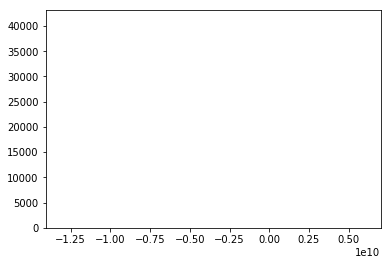

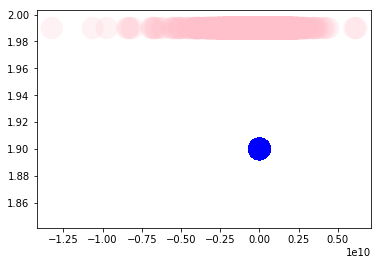

Score -1.68458380824e+15


In [60]:
### PRINT RESULTS ###
# Get histogram of predited data and test
hist_pred, bins_pred = np.histogram(pred_y, 75)
hist_test, bins_test = np.histogram(train_y, 75)

# Prepare result bars
width = 0.7 * (bins_pred[1] - bins_pred[0])
center = (bins_pred[:-1] + bins_pred[1:]) / 2
plt.bar(center, hist_pred, align='center', width=2, alpha=0.7, color='pink')

# Prepare real data bars
width = 0.7 * (bins_test[1] - bins_test[0])
center = (bins_test[:-1] + bins_test[1:]) / 2
plt.bar(center, hist_test, align='center', width=2, alpha=0.4, color='blue')

plt.show()

# Print 1D plots
plt.scatter(test_y, [1.9] * len(test_y), color='blue', alpha=0.2, s=500, edgecolors='none')
plt.scatter(pred_y, [1.99] * len(pred_y), color='pink', alpha=0.2, s=500, edgecolors='none')
plt.show()

print("Score " + str(score))